##  MAPPO and MAA2C training and performances comparison

In this notebook two MARL algorithms are compared in order to understand they pro and cons.
They are going to be compared during training, using three metrics:
- total maximum reward
- time to convergence ratio
- episodes to reward ratio

In [1]:
# imports
import sys
import os


sys.path.insert(0, os.getcwd())

import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from algorithms.MAA2C.maa2c_agent import MAA2C_Agent
from algorithms.MAPPO.mappo_agent import MAPPO_Agent
from algorithms.MAPPO.mappo_trainer import MAPPOTrainer
from algorithms.MAA2C.maa2c_trainer import MAA2CTrainer
from utils.environment_utils import GeneralizedOvercooked
from utils.training_utils import detect_plateau, plot_marl_comparison, test_soups_delivered,evaluate_agent, train_and_plot_mappo,train_and_plot_maa2c, cross_algorithm, run_cross_algorithm

## Self training phase

In [2]:
# training hyperparameters
total_episodes= 7500

# MAPPO
episodes_per_batch_mappo=10
batches_mappo= total_episodes // episodes_per_batch_mappo

#MAA2C
episodes_per_batch_maa2c=15
batches_maa2c= total_episodes // episodes_per_batch_maa2c

In [3]:
# layouts
layouts = [
           "cramped_room", 
           "asymmetric_advantages", 
           "coordination_ring",
           "forced_coordination"
           ]
# dictionary to store results
results = {}

In [4]:
for i, layout in enumerate(layouts, 1):
    print("Training on layout {}".format(layout))
    print("MAPPO")

    env = GeneralizedOvercooked(layouts=[layout])
    input_dim = env.observation_space.shape[-1]
    action_dim = env.action_space.n

    mappo_agent = MAPPO_Agent(input_dimension=input_dim, action_dimension=action_dim)
    maa2c_agent = MAA2C_Agent(n_agents=2, input_dimension=input_dim, action_dimension=action_dim)

    mappo_trainer = MAPPOTrainer(
        n_agents=2,
        mappo_agent=mappo_agent,
        episode_per_update=episodes_per_batch_mappo,
        environment=env,
        layouts=[layout]
    )

    maa2c_trainer= MAA2CTrainer(
        n_agents=2,
        maa2c_agent=maa2c_agent,
        episode_per_update=episodes_per_batch_maa2c,
        environment=env,
        layouts=[layout]
    )


    mean_rewards_mappo, episode_rewards_mappo, episode_time_mappo, actor_losses_mappo, critic_losses_mappo = mappo_trainer.training(
            model_name=f"{layout}_selfplay",
            batches=batches_mappo
        )

    mean_rewards_maa2c, episode_rewards_maa2c, episode_time_maa2c, actor_losses_maa2c, critic_losses_maa2c = maa2c_trainer.training(
            model_name=f"{layout}_selfplay",
            batches=batches_maa2c
        )
    
    
    mappo_max, mappo_ep, mappo_time = detect_plateau(mean_rewards_mappo, episode_time_mappo,
                                                      episodes_per_batch=episodes_per_batch_mappo)
    
    maa2c_max, maa2c_ep, maa2c_time = detect_plateau(mean_rewards_maa2c, episode_time_maa2c,
                                                      episodes_per_batch=episodes_per_batch_maa2c)
    # Store results in dictionary
    results[layout] = {
        "MAPPO": {
            "mean_rewards": mean_rewards_mappo,
            "episode_rewards": episode_rewards_mappo,
            "episode_time": episode_time_mappo,
            "actor_losses": actor_losses_mappo,
            "critic_losses": critic_losses_mappo,
            "max_reward": mappo_max,
            "plateau_episode": mappo_ep,
            "plateau_time": mappo_time
        },
        "MAA2C": {
            "mean_rewards": mean_rewards_maa2c,
            "episode_rewards": episode_rewards_maa2c,
            "episode_time": episode_time_maa2c,
            "actor_losses": actor_losses_maa2c,
            "critic_losses": critic_losses_maa2c,
            "max_reward": maa2c_max,
            "plateau_episode": maa2c_ep,
            "plateau_time": maa2c_time
        }
    }

Training on layout cramped_room
MAPPO


Training Progress:   7%|▋         | 50/750 [01:43<24:15,  2.08s/episode]

Batch 50, Mean Reward: 38.00, Actor Loss: 0.0026, Critic Loss: 3.1135


Training Progress:  13%|█▎        | 100/750 [03:36<25:29,  2.35s/episode]

Batch 100, Mean Reward: 240.00, Actor Loss: 0.0014, Critic Loss: 2.8987


Training Progress:  20%|██        | 150/750 [05:28<22:03,  2.21s/episode]

Batch 150, Mean Reward: 240.00, Actor Loss: 0.0001, Critic Loss: 4.1518


Training Progress:  27%|██▋       | 200/750 [07:19<20:34,  2.25s/episode]

Batch 200, Mean Reward: 240.00, Actor Loss: 0.0005, Critic Loss: 4.2517


Training Progress:  33%|███▎      | 250/750 [09:11<18:41,  2.24s/episode]

Batch 250, Mean Reward: 240.00, Actor Loss: 0.0006, Critic Loss: 4.0293


Training Progress:  40%|████      | 300/750 [11:03<16:57,  2.26s/episode]

Batch 300, Mean Reward: 240.00, Actor Loss: -0.0013, Critic Loss: 4.0330


Training Progress:  47%|████▋     | 350/750 [12:56<15:20,  2.30s/episode]

Batch 350, Mean Reward: 240.00, Actor Loss: 0.0003, Critic Loss: 3.8987


Training Progress:  53%|█████▎    | 400/750 [14:49<13:01,  2.23s/episode]

Batch 400, Mean Reward: 240.00, Actor Loss: 0.0001, Critic Loss: 3.9434


Training Progress:  60%|██████    | 450/750 [16:41<11:10,  2.23s/episode]

Batch 450, Mean Reward: 240.00, Actor Loss: -0.0006, Critic Loss: 4.0352


Training Progress:  67%|██████▋   | 500/750 [18:34<09:24,  2.26s/episode]

Batch 500, Mean Reward: 240.00, Actor Loss: 0.0000, Critic Loss: 4.1493


Training Progress:  73%|███████▎  | 550/750 [20:27<07:23,  2.22s/episode]

Batch 550, Mean Reward: 240.00, Actor Loss: 0.0001, Critic Loss: 4.1232


Training Progress:  80%|████████  | 600/750 [22:20<05:44,  2.30s/episode]

Batch 600, Mean Reward: 240.00, Actor Loss: 0.0000, Critic Loss: 3.6053


Training Progress:  87%|████████▋ | 650/750 [24:14<03:47,  2.28s/episode]

Batch 650, Mean Reward: 240.00, Actor Loss: -0.0002, Critic Loss: 4.1951


Training Progress:  93%|█████████▎| 700/750 [26:06<01:52,  2.25s/episode]

Batch 700, Mean Reward: 240.00, Actor Loss: -0.0002, Critic Loss: 4.2039


Training Progress: 100%|██████████| 750/750 [28:00<00:00,  2.24s/episode]


Batch 750, Mean Reward: 240.00, Actor Loss: -0.0006, Critic Loss: 4.2238
Models saved as cramped_room_selfplay_actor.pth and cramped_room_selfplay_critic.pth


Training Progress:  10%|█         | 50/500 [02:03<18:47,  2.50s/episode]

Batch 50, Mean Reward: 5.33, Actor Loss: -0.0259, Critic Loss: 1.6607


Training Progress:  20%|██        | 100/500 [04:08<17:06,  2.57s/episode]

Batch 100, Mean Reward: 68.00, Actor Loss: -0.0319, Critic Loss: 4.7981


Training Progress:  30%|███       | 150/500 [06:14<14:46,  2.53s/episode]

Batch 150, Mean Reward: 162.67, Actor Loss: -0.0929, Critic Loss: 12.5211


Training Progress:  40%|████      | 200/500 [08:19<12:23,  2.48s/episode]

Batch 200, Mean Reward: 209.33, Actor Loss: 0.1094, Critic Loss: 16.9665


Training Progress:  50%|█████     | 250/500 [10:25<10:30,  2.52s/episode]

Batch 250, Mean Reward: 220.00, Actor Loss: 0.0174, Critic Loss: 6.7376


Training Progress:  60%|██████    | 300/500 [12:31<08:24,  2.52s/episode]

Batch 300, Mean Reward: 220.00, Actor Loss: -0.0572, Critic Loss: 6.9192


Training Progress:  70%|███████   | 350/500 [14:36<06:12,  2.48s/episode]

Batch 350, Mean Reward: 220.00, Actor Loss: -0.0594, Critic Loss: 8.8944


Training Progress:  80%|████████  | 400/500 [16:42<04:11,  2.52s/episode]

Batch 400, Mean Reward: 220.00, Actor Loss: 0.0084, Critic Loss: 5.3752


Training Progress:  90%|█████████ | 450/500 [18:48<02:04,  2.49s/episode]

Batch 450, Mean Reward: 220.00, Actor Loss: -0.0117, Critic Loss: 4.3337


Training Progress: 100%|██████████| 500/500 [20:52<00:00,  2.51s/episode]

Batch 500, Mean Reward: 220.00, Actor Loss: 0.0121, Critic Loss: 6.6140
Models saved as cramped_room_selfplay_actor.pth and cramped_room_selfplay_critic.pth
Training on layout asymmetric_advantages
MAPPO



Training Progress:   7%|▋         | 50/750 [02:02<28:34,  2.45s/episode]

Batch 50, Mean Reward: 244.00, Actor Loss: 0.0014, Critic Loss: 4.2649


Training Progress:  13%|█▎        | 100/750 [04:06<27:07,  2.50s/episode]

Batch 100, Mean Reward: 254.00, Actor Loss: 0.0002, Critic Loss: 2.9517


Training Progress:  20%|██        | 150/750 [06:12<25:05,  2.51s/episode]

Batch 150, Mean Reward: 260.00, Actor Loss: 0.0005, Critic Loss: 3.2614


Training Progress:  27%|██▋       | 200/750 [08:16<22:40,  2.47s/episode]

Batch 200, Mean Reward: 260.00, Actor Loss: 0.0001, Critic Loss: 3.4153


Training Progress:  33%|███▎      | 250/750 [10:21<20:50,  2.50s/episode]

Batch 250, Mean Reward: 260.00, Actor Loss: -0.0008, Critic Loss: 3.2476


Training Progress:  40%|████      | 300/750 [12:25<18:39,  2.49s/episode]

Batch 300, Mean Reward: 260.00, Actor Loss: 0.0006, Critic Loss: 3.2865


Training Progress:  47%|████▋     | 350/750 [14:29<16:37,  2.49s/episode]

Batch 350, Mean Reward: 236.00, Actor Loss: 0.0008, Critic Loss: 3.2743


Training Progress:  53%|█████▎    | 400/750 [16:36<14:31,  2.49s/episode]

Batch 400, Mean Reward: 260.00, Actor Loss: -0.0003, Critic Loss: 3.3640


Training Progress:  60%|██████    | 450/750 [18:42<12:24,  2.48s/episode]

Batch 450, Mean Reward: 260.00, Actor Loss: 0.0005, Critic Loss: 3.3586


Training Progress:  67%|██████▋   | 500/750 [20:47<10:25,  2.50s/episode]

Batch 500, Mean Reward: 260.00, Actor Loss: 0.0004, Critic Loss: 3.3612


Training Progress:  73%|███████▎  | 550/750 [22:51<08:11,  2.46s/episode]

Batch 550, Mean Reward: 250.00, Actor Loss: 0.0002, Critic Loss: 3.0470


Training Progress:  80%|████████  | 600/750 [24:55<06:11,  2.48s/episode]

Batch 600, Mean Reward: 260.00, Actor Loss: 0.0000, Critic Loss: 3.5132


Training Progress:  87%|████████▋ | 650/750 [26:59<04:06,  2.46s/episode]

Batch 650, Mean Reward: 260.00, Actor Loss: 0.0001, Critic Loss: 3.3946


Training Progress:  93%|█████████▎| 700/750 [29:04<02:05,  2.51s/episode]

Batch 700, Mean Reward: 260.00, Actor Loss: 0.0004, Critic Loss: 3.1622


Training Progress: 100%|██████████| 750/750 [31:09<00:00,  2.49s/episode]


Batch 750, Mean Reward: 260.00, Actor Loss: 0.0008, Critic Loss: 3.1758
Models saved as asymmetric_advantages_selfplay_actor.pth and asymmetric_advantages_selfplay_critic.pth


Training Progress:  10%|█         | 50/500 [02:18<20:48,  2.77s/episode]

Batch 50, Mean Reward: 26.67, Actor Loss: -0.0199, Critic Loss: 2.6944


Training Progress:  20%|██        | 100/500 [04:35<18:12,  2.73s/episode]

Batch 100, Mean Reward: 138.67, Actor Loss: -0.0242, Critic Loss: 4.8900


Training Progress:  30%|███       | 150/500 [06:54<16:04,  2.76s/episode]

Batch 150, Mean Reward: 262.67, Actor Loss: -0.1312, Critic Loss: 16.4624


Training Progress:  40%|████      | 200/500 [09:16<14:28,  2.90s/episode]

Batch 200, Mean Reward: 385.33, Actor Loss: -0.0212, Critic Loss: 25.2179


Training Progress:  50%|█████     | 250/500 [11:39<11:58,  2.87s/episode]

Batch 250, Mean Reward: 473.33, Actor Loss: 0.0003, Critic Loss: 14.2620


Training Progress:  60%|██████    | 300/500 [14:02<09:37,  2.89s/episode]

Batch 300, Mean Reward: 465.33, Actor Loss: -0.0166, Critic Loss: 49.0545


Training Progress:  70%|███████   | 350/500 [16:25<07:11,  2.88s/episode]

Batch 350, Mean Reward: 480.00, Actor Loss: -0.0264, Critic Loss: 39.6162


Training Progress:  80%|████████  | 400/500 [18:49<04:42,  2.83s/episode]

Batch 400, Mean Reward: 478.67, Actor Loss: -0.0172, Critic Loss: 24.0049


Training Progress:  90%|█████████ | 450/500 [21:12<02:21,  2.83s/episode]

Batch 450, Mean Reward: 480.00, Actor Loss: 0.0000, Critic Loss: 22.1852


Training Progress: 100%|██████████| 500/500 [23:35<00:00,  2.83s/episode]


Batch 500, Mean Reward: 478.67, Actor Loss: 0.0241, Critic Loss: 37.7702
Models saved as asymmetric_advantages_selfplay_actor.pth and asymmetric_advantages_selfplay_critic.pth
Training on layout coordination_ring
MAPPO


Training Progress:   7%|▋         | 50/750 [02:01<28:21,  2.43s/episode]

Batch 50, Mean Reward: 48.00, Actor Loss: -0.0022, Critic Loss: 3.4549


Training Progress:  13%|█▎        | 100/750 [04:02<26:57,  2.49s/episode]

Batch 100, Mean Reward: 180.00, Actor Loss: -0.0006, Critic Loss: 0.8648


Training Progress:  20%|██        | 150/750 [06:04<24:10,  2.42s/episode]

Batch 150, Mean Reward: 180.00, Actor Loss: -0.0003, Critic Loss: 1.0785


Training Progress:  27%|██▋       | 200/750 [08:05<22:09,  2.42s/episode]

Batch 200, Mean Reward: 180.00, Actor Loss: 0.0001, Critic Loss: 0.8021


Training Progress:  33%|███▎      | 250/750 [10:05<20:18,  2.44s/episode]

Batch 250, Mean Reward: 180.00, Actor Loss: 0.0007, Critic Loss: 0.7636


Training Progress:  40%|████      | 300/750 [12:06<17:55,  2.39s/episode]

Batch 300, Mean Reward: 180.00, Actor Loss: 0.0001, Critic Loss: 0.7687


Training Progress:  47%|████▋     | 350/750 [14:08<16:13,  2.43s/episode]

Batch 350, Mean Reward: 176.00, Actor Loss: -0.0067, Critic Loss: 1.1544


Training Progress:  53%|█████▎    | 400/750 [16:10<14:14,  2.44s/episode]

Batch 400, Mean Reward: 180.00, Actor Loss: 0.0037, Critic Loss: 1.9761


Training Progress:  60%|██████    | 450/750 [18:12<12:04,  2.42s/episode]

Batch 450, Mean Reward: 180.00, Actor Loss: -0.0001, Critic Loss: 2.3121


Training Progress:  67%|██████▋   | 500/750 [20:16<10:04,  2.42s/episode]

Batch 500, Mean Reward: 178.00, Actor Loss: -0.0016, Critic Loss: 2.5138


Training Progress:  73%|███████▎  | 550/750 [22:18<08:07,  2.44s/episode]

Batch 550, Mean Reward: 180.00, Actor Loss: -0.0008, Critic Loss: 2.3409


Training Progress:  80%|████████  | 600/750 [24:20<06:01,  2.41s/episode]

Batch 600, Mean Reward: 180.00, Actor Loss: 0.0002, Critic Loss: 3.8119


Training Progress:  87%|████████▋ | 650/750 [26:22<04:06,  2.46s/episode]

Batch 650, Mean Reward: 180.00, Actor Loss: -0.0000, Critic Loss: 3.8730


Training Progress:  93%|█████████▎| 700/750 [28:23<01:59,  2.39s/episode]

Batch 700, Mean Reward: 180.00, Actor Loss: -0.0010, Critic Loss: 3.8064


Training Progress: 100%|██████████| 750/750 [30:23<00:00,  2.43s/episode]


Batch 750, Mean Reward: 180.00, Actor Loss: -0.0002, Critic Loss: 3.8187
Models saved as coordination_ring_selfplay_actor.pth and coordination_ring_selfplay_critic.pth


Training Progress:  10%|█         | 50/500 [02:12<20:11,  2.69s/episode]

Batch 50, Mean Reward: 1.33, Actor Loss: -0.0202, Critic Loss: 0.4349


Training Progress:  20%|██        | 100/500 [04:27<17:56,  2.69s/episode]

Batch 100, Mean Reward: 21.33, Actor Loss: -0.0191, Critic Loss: 2.7465


Training Progress:  30%|███       | 150/500 [06:42<15:39,  2.68s/episode]

Batch 150, Mean Reward: 73.33, Actor Loss: -0.0364, Critic Loss: 5.5344


Training Progress:  40%|████      | 200/500 [08:57<13:27,  2.69s/episode]

Batch 200, Mean Reward: 100.00, Actor Loss: -0.0153, Critic Loss: 10.4185


Training Progress:  50%|█████     | 250/500 [11:10<11:06,  2.66s/episode]

Batch 250, Mean Reward: 150.67, Actor Loss: 0.0062, Critic Loss: 6.1574


Training Progress:  60%|██████    | 300/500 [13:24<08:59,  2.70s/episode]

Batch 300, Mean Reward: 161.33, Actor Loss: 0.0477, Critic Loss: 11.5220


Training Progress:  70%|███████   | 350/500 [15:39<06:40,  2.67s/episode]

Batch 350, Mean Reward: 204.00, Actor Loss: -0.0611, Critic Loss: 8.0989


Training Progress:  80%|████████  | 400/500 [17:54<04:26,  2.66s/episode]

Batch 400, Mean Reward: 201.33, Actor Loss: -0.0159, Critic Loss: 6.8036


Training Progress:  90%|█████████ | 450/500 [20:08<02:13,  2.67s/episode]

Batch 450, Mean Reward: 204.00, Actor Loss: 0.0511, Critic Loss: 8.9027


Training Progress: 100%|██████████| 500/500 [22:23<00:00,  2.69s/episode]


Batch 500, Mean Reward: 218.67, Actor Loss: 0.0014, Critic Loss: 5.2680
Models saved as coordination_ring_selfplay_actor.pth and coordination_ring_selfplay_critic.pth
Training on layout forced_coordination
MAPPO


Training Progress:   7%|▋         | 50/750 [01:56<27:38,  2.37s/episode]

Batch 50, Mean Reward: 0.00, Actor Loss: 0.0001, Critic Loss: 0.3383


Training Progress:  13%|█▎        | 100/750 [03:53<25:53,  2.39s/episode]

Batch 100, Mean Reward: 6.00, Actor Loss: -0.0015, Critic Loss: 0.5555


Training Progress:  20%|██        | 150/750 [05:50<23:39,  2.37s/episode]

Batch 150, Mean Reward: 114.00, Actor Loss: -0.0012, Critic Loss: 3.3517


Training Progress:  27%|██▋       | 200/750 [07:46<21:24,  2.33s/episode]

Batch 200, Mean Reward: 160.00, Actor Loss: -0.0046, Critic Loss: 2.2471


Training Progress:  33%|███▎      | 250/750 [09:43<19:22,  2.32s/episode]

Batch 250, Mean Reward: 200.00, Actor Loss: -0.0030, Critic Loss: 2.8735


Training Progress:  40%|████      | 300/750 [11:39<17:37,  2.35s/episode]

Batch 300, Mean Reward: 204.00, Actor Loss: 0.0048, Critic Loss: 2.6789


Training Progress:  47%|████▋     | 350/750 [13:36<15:26,  2.32s/episode]

Batch 350, Mean Reward: 244.00, Actor Loss: -0.0026, Critic Loss: 3.9864


Training Progress:  53%|█████▎    | 400/750 [15:34<13:33,  2.32s/episode]

Batch 400, Mean Reward: 260.00, Actor Loss: -0.0001, Critic Loss: 2.9716


Training Progress:  60%|██████    | 450/750 [17:30<11:34,  2.31s/episode]

Batch 450, Mean Reward: 238.00, Actor Loss: -0.0010, Critic Loss: 2.7964


Training Progress:  67%|██████▋   | 500/750 [19:27<09:42,  2.33s/episode]

Batch 500, Mean Reward: 260.00, Actor Loss: -0.0019, Critic Loss: 5.7881


Training Progress:  73%|███████▎  | 550/750 [21:24<07:47,  2.34s/episode]

Batch 550, Mean Reward: 300.00, Actor Loss: -0.0001, Critic Loss: 7.1134


Training Progress:  80%|████████  | 600/750 [23:21<05:51,  2.34s/episode]

Batch 600, Mean Reward: 298.00, Actor Loss: -0.0004, Critic Loss: 7.2583


Training Progress:  87%|████████▋ | 650/750 [25:18<03:51,  2.32s/episode]

Batch 650, Mean Reward: 242.00, Actor Loss: -0.0004, Critic Loss: 5.8670


Training Progress:  93%|█████████▎| 700/750 [27:19<01:56,  2.33s/episode]

Batch 700, Mean Reward: 288.00, Actor Loss: -0.0015, Critic Loss: 5.8274


Training Progress: 100%|██████████| 750/750 [29:16<00:00,  2.34s/episode]


Batch 750, Mean Reward: 274.00, Actor Loss: -0.0016, Critic Loss: 5.9547
Models saved as forced_coordination_selfplay_actor.pth and forced_coordination_selfplay_critic.pth


Training Progress:  10%|█         | 50/500 [02:04<19:06,  2.55s/episode]

Batch 50, Mean Reward: 0.00, Actor Loss: -0.0255, Critic Loss: 0.1195


Training Progress:  20%|██        | 100/500 [04:10<16:50,  2.53s/episode]

Batch 100, Mean Reward: 4.00, Actor Loss: -0.0182, Critic Loss: 0.9675


Training Progress:  30%|███       | 150/500 [06:15<14:40,  2.51s/episode]

Batch 150, Mean Reward: 5.33, Actor Loss: -0.0177, Critic Loss: 0.5629


Training Progress:  40%|████      | 200/500 [08:21<12:27,  2.49s/episode]

Batch 200, Mean Reward: 26.67, Actor Loss: -0.0373, Critic Loss: 4.4321


Training Progress:  50%|█████     | 250/500 [10:26<10:33,  2.54s/episode]

Batch 250, Mean Reward: 64.00, Actor Loss: -0.0780, Critic Loss: 6.8528


Training Progress:  60%|██████    | 300/500 [12:32<08:25,  2.53s/episode]

Batch 300, Mean Reward: 66.67, Actor Loss: -0.0977, Critic Loss: 5.8395


Training Progress:  70%|███████   | 350/500 [14:38<06:28,  2.59s/episode]

Batch 350, Mean Reward: 134.67, Actor Loss: -0.0797, Critic Loss: 16.8385


Training Progress:  80%|████████  | 400/500 [16:45<04:11,  2.51s/episode]

Batch 400, Mean Reward: 116.00, Actor Loss: 0.0442, Critic Loss: 6.9995


Training Progress:  90%|█████████ | 450/500 [18:52<02:06,  2.52s/episode]

Batch 450, Mean Reward: 184.00, Actor Loss: -0.0356, Critic Loss: 6.2677


Training Progress: 100%|██████████| 500/500 [21:00<00:00,  2.52s/episode]

Batch 500, Mean Reward: 200.00, Actor Loss: -0.0663, Critic Loss: 12.5189
Models saved as forced_coordination_selfplay_actor.pth and forced_coordination_selfplay_critic.pth


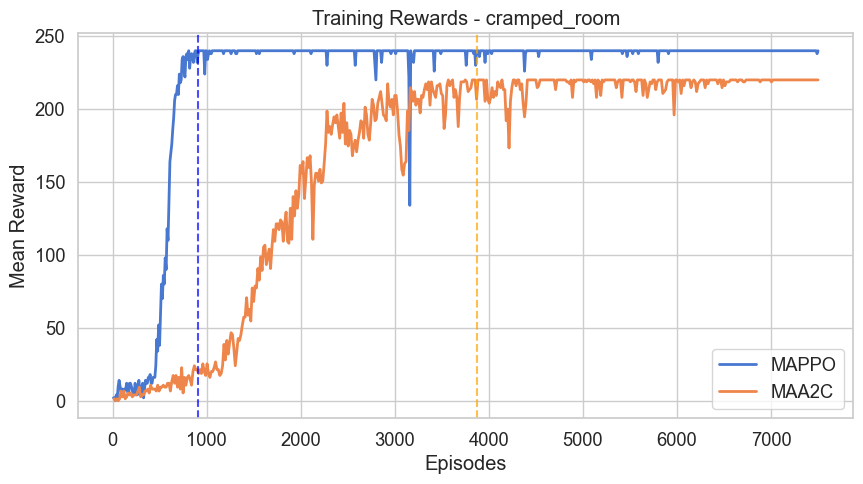


Performance Comparison - cramped_room
MAPPO:  Max Reward = 240.00, Episodes to Plateau = 910, Time to Plateau = 204.89s
MAA2C:  Max Reward = 220.00, Episodes to Plateau = 3870, Time to Plateau = 655.30s


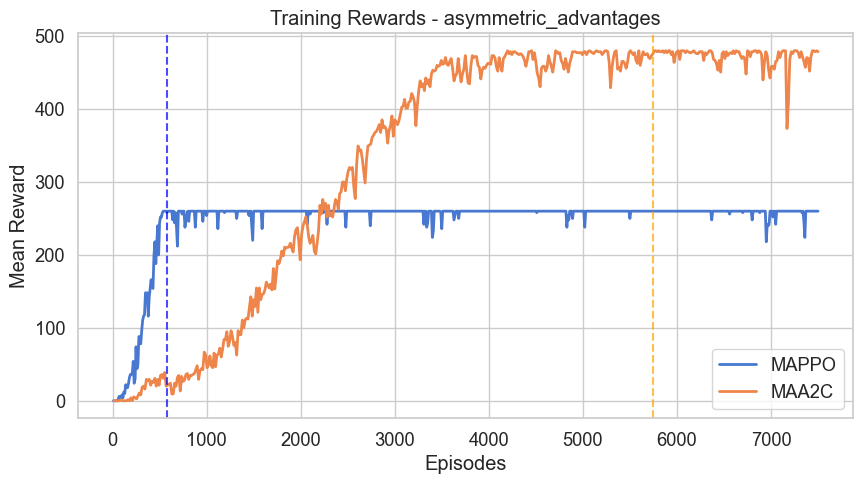


Performance Comparison - asymmetric_advantages
MAPPO:  Max Reward = 260.00, Episodes to Plateau = 580, Time to Plateau = 152.37s
MAA2C:  Max Reward = 479.47, Episodes to Plateau = 5745, Time to Plateau = 1091.39s


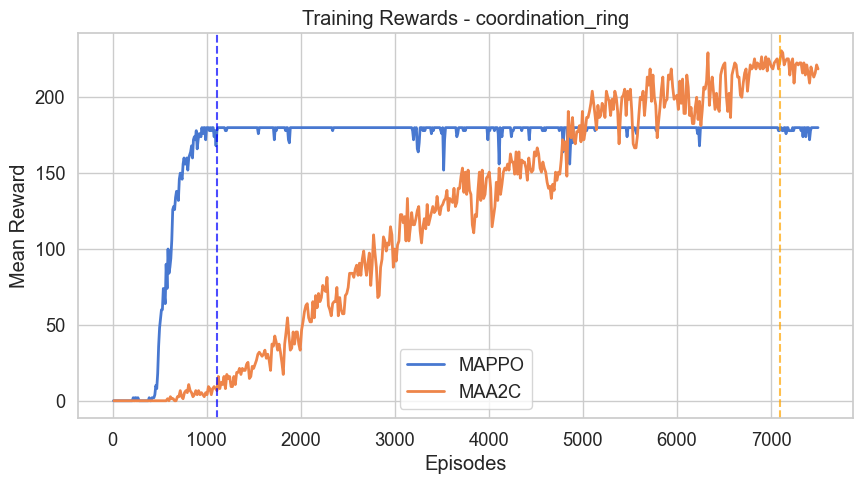


Performance Comparison - coordination_ring
MAPPO:  Max Reward = 180.00, Episodes to Plateau = 1110, Time to Plateau = 279.18s
MAA2C:  Max Reward = 226.13, Episodes to Plateau = 7095, Time to Plateau = 1281.35s


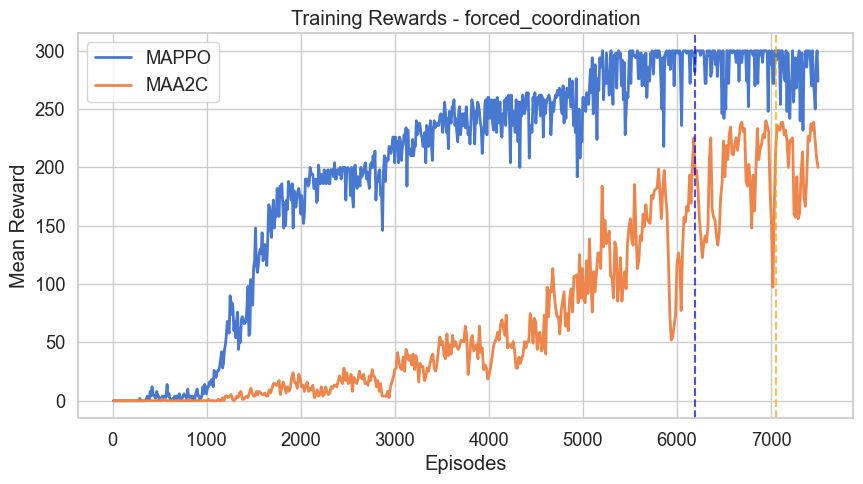


Performance Comparison - forced_coordination
MAPPO:  Max Reward = 300.00, Episodes to Plateau = 6190, Time to Plateau = 1454.47s
MAA2C:  Max Reward = 235.47, Episodes to Plateau = 7050, Time to Plateau = 1193.52s


In [14]:
for layout, data in results.items():
    mappo_data = data["MAPPO"]
    maa2c_data = data["MAA2C"]

    plot_marl_comparison(
        layout,
        mappo_data["mean_rewards"], maa2c_data["mean_rewards"],
        episodes_per_batch_mappo, episodes_per_batch_maa2c,
        mappo_data["plateau_episode"], maa2c_data["plateau_episode"],
        mappo_data["max_reward"], maa2c_data["max_reward"],
        mappo_data["plateau_time"], maa2c_data["plateau_time"]
    )

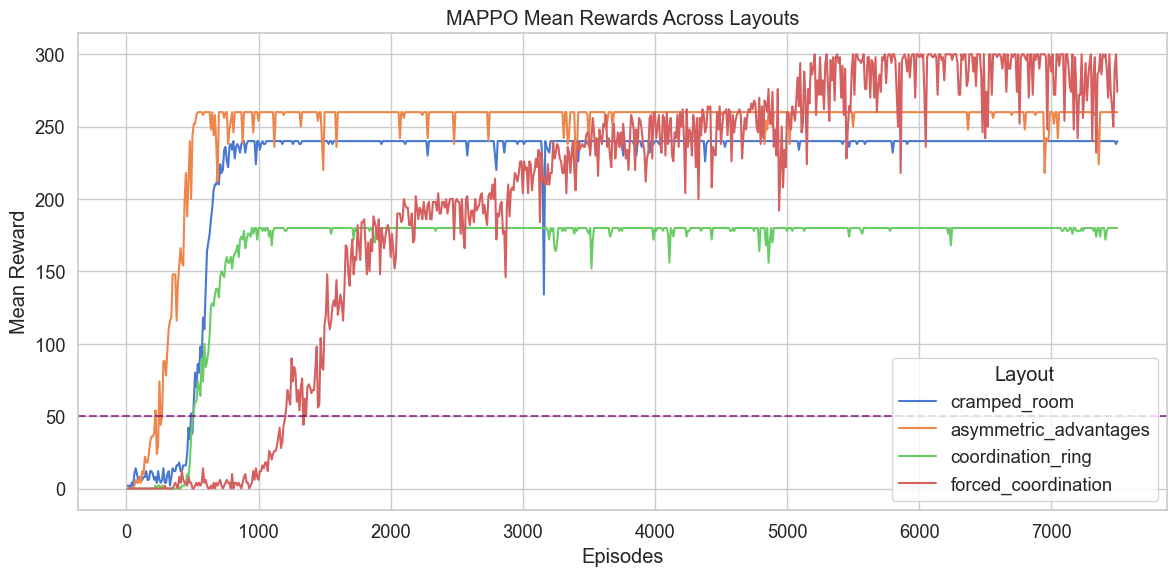

In [22]:
# plot all mappo layouts 
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(12, 6))

for layout in layouts:
    rewards = results[layout]["MAPPO"]["mean_rewards"]
    episodes = np.arange(1, len(rewards) + 1) * episodes_per_batch_mappo
    plt.plot(episodes, rewards, label=f"{layout}")

plt.axhline(50, color="purple", ls="--", alpha=0.7)
plt.title("MAPPO Mean Rewards Across Layouts")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.legend(title="Layout")
plt.tight_layout()
plt.show()

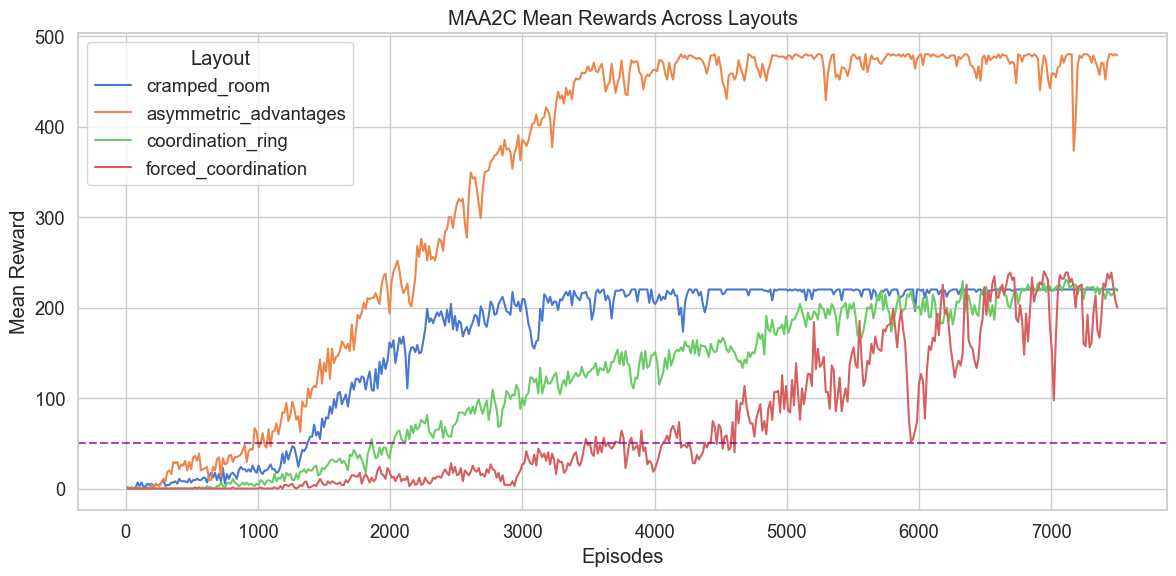

In [23]:
# plot all maa2c layouts 
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(12, 6))

for layout in layouts:
    rewards = results[layout]["MAA2C"]["mean_rewards"]
    episodes = np.arange(1, len(rewards) + 1) * episodes_per_batch_maa2c
    plt.plot(episodes, rewards, label=f"{layout}")

plt.axhline(50, color="purple", ls="--", alpha=0.7)
plt.title("MAA2C Mean Rewards Across Layouts")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.legend(title="Layout")
plt.tight_layout()
plt.show()


### Test phase: soup delivered

In [ ]:
test_episodes=5
layouts = [
           "cramped_room", 
           "asymmetric_advantages", 
           "coordination_ring",
           "forced_coordination"
           ]
print("\n Testing Results:")
print("="* 0)
for i, layout in enumerate(layouts):
    actor_path_mappo = f"{layout}_selfplay_actor.pth"
    critic_path_mappo = f"{layout}_selfplay_critic.pth"
    actor_path_maa2c = f"{layout}_selfplay_actor.pth"
    critic_path_maa2c = f"{layout}_selfplay_critic.pth"
    print(actor_path_maa2c)

    test_rewards_mappo, test_soups_mappo = test_soups_delivered(layouts=[layout],episodes=test_episodes,agent=mappo_agent,actor_path=actor_path_mappo,critic_path=critic_path_mappo)
    mean_reward = sum(test_rewards_mappo[0]) / len(test_rewards_mappo[0])
    mean_soups = sum(test_soups_mappo[0]) / len(test_soups_mappo[0])
    std_reward = np.std(test_rewards_mappo[0]) if len(test_rewards_mappo[0]) > 1 else 0
    print(f" {layout}:")
    print(f"    Mean Reward: {mean_reward:.2f} ± {std_reward:.2f}")
    print(f"    Mean Soups Count: {mean_soups:.2f}")
    print()

    test_rewards_maa2c, test_soups_maa2c = test_soups_delivered(layouts=[layout],
    episodes=test_episodes,
    agent=maa2c_agent,
    actor_path=actor_path_maa2c,
    critic_path=critic_path_maa2c)

    mean_reward = sum(test_rewards_maa2c[0]) / len(test_rewards_maa2c[0])
    mean_soups = sum(test_soups_maa2c[0]) / len(test_soups_maa2c[0])
    std_reward = np.std(test_rewards_maa2c[0]) if len(test_rewards_maa2c[0]) > 1 else 0
    print(f" {layout}:")
    print(f"    Mean Reward: {mean_reward:.2f} ± {std_reward:.2f}")
    print(f"    Mean Soups Count: {mean_soups:.2f}")
    print()


 Testing Results:

cramped_room_selfplay_actor.pth
Testing layout: cramped_room
12
12
12
12
12
 Completed cramped_room: 5 episodes
 cramped_room:
    Mean Reward: 240.00 ± 0.00
    Mean Soups Count: 12.00

Testing layout: cramped_room
11
11
11
11
11
 Completed cramped_room: 5 episodes
 cramped_room:
    Mean Reward: 220.00 ± 0.00
    Mean Soups Count: 11.00

asymmetric_advantages_selfplay_actor.pth
Testing layout: asymmetric_advantages
13
13
13
13
13
 Completed asymmetric_advantages: 5 episodes
 asymmetric_advantages:
    Mean Reward: 260.00 ± 0.00
    Mean Soups Count: 13.00

Testing layout: asymmetric_advantages
24
24
24
24
24
 Completed asymmetric_advantages: 5 episodes
 asymmetric_advantages:
    Mean Reward: 480.00 ± 0.00
    Mean Soups Count: 24.00

coordination_ring_selfplay_actor.pth
Testing layout: coordination_ring
9
9
9
9
9
 Completed coordination_ring: 5 episodes
 coordination_ring:
    Mean Reward: 180.00 ± 0.00
    Mean Soups Count: 9.00

Testing layout: coordination_rin

## Generalization phase

### MAPPO

In [8]:
# training hyperparameters
total_episodes= 5000

# MAPPO
episodes_per_batch_mappo=10
batches_mappo= total_episodes // episodes_per_batch_mappo

In [53]:
layouts1 = ["cramped_room", "asymmetric_advantages"]
layouts2 = ["coordination_ring","forced_coordination"]
layouts3 = ["centre_pots","centre_objects"]
layouts4 = [
           "cramped_room",
           "coordination_ring",
           "forced_coordination",
           "large_room",
           "five_by_five"
           ]
layouts5 = [
           "cramped_room",
           "coordination_ring",
           "forced_coordination",
           "large_room",
           "five_by_five",
           "centre_pots",
           "centre_objects"
           ]

Training on multiple layouts: ['cramped_room', 'asymmetric_advantages']


Training Progress:  10%|█         | 50/500 [01:54<17:52,  2.38s/episode]

Batch 50, Mean Reward: 48.00, Actor Loss: 0.0018, Critic Loss: 1.7990


Training Progress:  20%|██        | 100/500 [03:48<15:16,  2.29s/episode]

Batch 100, Mean Reward: 216.00, Actor Loss: -0.0020, Critic Loss: 2.3774


Training Progress:  30%|███       | 150/500 [05:46<13:53,  2.38s/episode]

Batch 150, Mean Reward: 222.00, Actor Loss: -0.0006, Critic Loss: 2.1824


Training Progress:  40%|████      | 200/500 [07:47<12:00,  2.40s/episode]

Batch 200, Mean Reward: 230.00, Actor Loss: -0.0005, Critic Loss: 1.9124


Training Progress:  50%|█████     | 250/500 [09:45<09:56,  2.39s/episode]

Batch 250, Mean Reward: 230.00, Actor Loss: -0.0001, Critic Loss: 1.9289


Training Progress:  60%|██████    | 300/500 [11:44<07:49,  2.35s/episode]

Batch 300, Mean Reward: 212.00, Actor Loss: -0.0009, Critic Loss: 1.1659


Training Progress:  70%|███████   | 350/500 [13:44<05:57,  2.39s/episode]

Batch 350, Mean Reward: 242.00, Actor Loss: -0.0004, Critic Loss: 5.4505


Training Progress:  80%|████████  | 400/500 [15:48<04:15,  2.56s/episode]

Batch 400, Mean Reward: 218.00, Actor Loss: -0.0005, Critic Loss: 1.5661


Training Progress:  90%|█████████ | 450/500 [17:51<01:59,  2.39s/episode]

Batch 450, Mean Reward: 242.00, Actor Loss: 0.0008, Critic Loss: 2.6930


Training Progress: 100%|██████████| 500/500 [19:52<00:00,  2.39s/episode]

Batch 500, Mean Reward: 224.00, Actor Loss: 0.0005, Critic Loss: 1.9303
Models saved as multi_layout_generalized1_actor.pth and multi_layout_generalized1_critic.pth


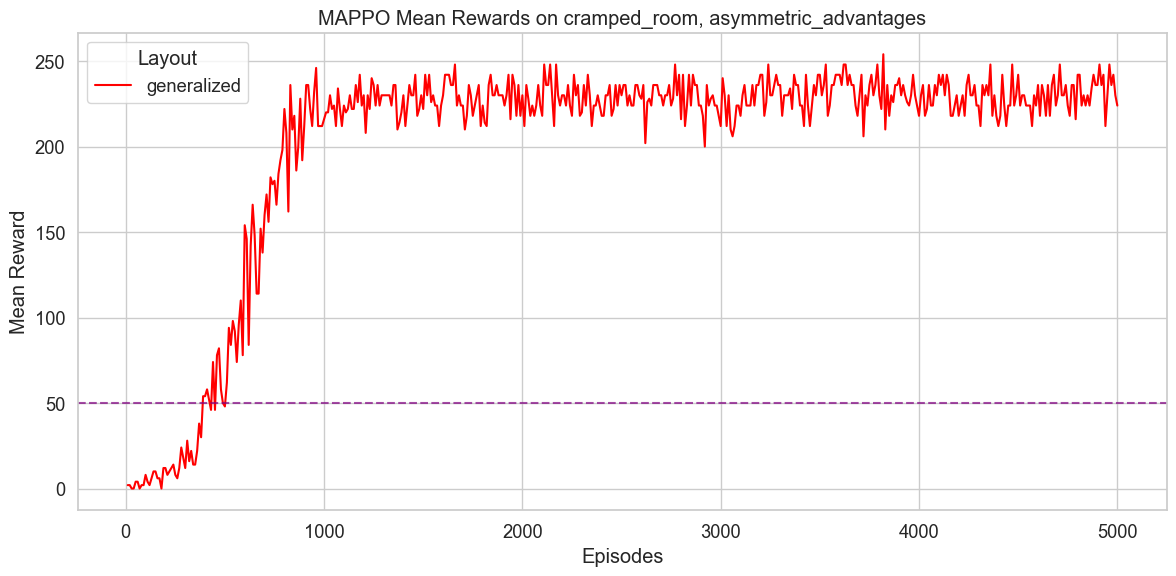

In [67]:
mappo_agent1,mean_rewards1, episode_rewards1, episode_time1, actor_losses1, critic_losses1 = train_and_plot_mappo(
    layouts=layouts1,
    model_name="multi_layout_generalized1",
    iters=10,
    episodes_per_batch=episodes_per_batch_mappo,
    batches=batches_mappo
)

In [68]:
# Test agent 1
evaluate_agent(
    layouts=layouts1,
    test_episodes=5,
    agent=mappo_agent1,
    actor_path="multi_layout_generalized1_actor.pth",
    critic_path="multi_layout_generalized1_critic.pth"
)

Testing layout: cramped_room
10
10
10
10
10
 Completed cramped_room: 5 episodes
Testing layout: asymmetric_advantages
13
13
13
13
13
 Completed asymmetric_advantages: 5 episodes

Test Results over 5 episodes per layout:
  Layout: cramped_room
    Avg Reward: 200.00
    Avg Soups Delivered: 10.00
  Layout: asymmetric_advantages
    Avg Reward: 260.00
    Avg Soups Delivered: 13.00


([[200, 200, 200, 200, 200], [260, 260, 260, 260, 260]],
 [[10, 10, 10, 10, 10], [13, 13, 13, 13, 13]])

Training on multiple layouts: ['coordination_ring', 'forced_coordination']


Training Progress:  10%|█         | 50/500 [02:10<18:43,  2.50s/episode]

Batch 50, Mean Reward: 2.00, Actor Loss: 0.0035, Critic Loss: 0.4293


Training Progress:  20%|██        | 100/500 [04:29<16:46,  2.52s/episode]

Batch 100, Mean Reward: 10.00, Actor Loss: -0.0007, Critic Loss: 0.9052


Training Progress:  30%|███       | 150/500 [06:32<14:36,  2.50s/episode]

Batch 150, Mean Reward: 92.00, Actor Loss: 0.0004, Critic Loss: 0.8960


Training Progress:  40%|████      | 200/500 [08:35<12:19,  2.47s/episode]

Batch 200, Mean Reward: 64.00, Actor Loss: -0.0049, Critic Loss: 0.8468


Training Progress:  50%|█████     | 250/500 [10:41<10:02,  2.41s/episode]

Batch 250, Mean Reward: 62.00, Actor Loss: 0.0004, Critic Loss: 1.2325


Training Progress:  60%|██████    | 300/500 [12:43<08:09,  2.45s/episode]

Batch 300, Mean Reward: 72.00, Actor Loss: -0.0001, Critic Loss: 0.7900


Training Progress:  70%|███████   | 350/500 [14:46<05:55,  2.37s/episode]

Batch 350, Mean Reward: 98.00, Actor Loss: -0.0002, Critic Loss: 1.7179


Training Progress:  80%|████████  | 400/500 [16:45<04:05,  2.45s/episode]

Batch 400, Mean Reward: 114.00, Actor Loss: -0.0015, Critic Loss: 1.7515


Training Progress:  90%|█████████ | 450/500 [18:52<02:17,  2.76s/episode]

Batch 450, Mean Reward: 90.00, Actor Loss: -0.0013, Critic Loss: 1.9683


Training Progress: 100%|██████████| 500/500 [20:58<00:00,  2.52s/episode]

Batch 500, Mean Reward: 136.00, Actor Loss: -0.0008, Critic Loss: 1.4521
Models saved as multi_layout_generalized2_actor.pth and multi_layout_generalized2_critic.pth


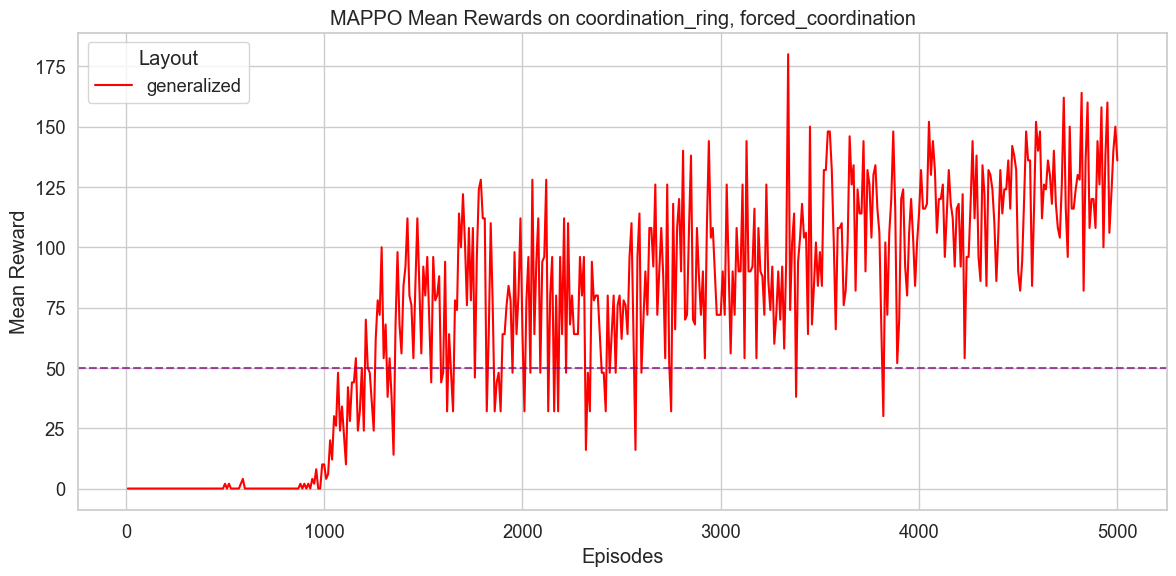

In [36]:
mappo_agent2,mean_rewards2, episode_rewards2, episode_time2, actor_losses2, critic_losses2  = train_and_plot_mappo(
    layouts=layouts2,
    model_name="multi_layout_generalized2",
    iters=10,
    episodes_per_batch=episodes_per_batch_mappo,
    batches=batches_mappo
)

In [37]:
rewards, soups = evaluate_agent(
    layouts=layouts2,
    test_episodes=5,
    agent=mappo_agent2,
    actor_path="multi_layout_generalized2_actor.pth",
    critic_path="multi_layout_generalized2_critic.pth"
)

Testing layout: coordination_ring
9
9
9
9
9
 Completed coordination_ring: 5 episodes
Testing layout: forced_coordination
4
4
4
4
4
 Completed forced_coordination: 5 episodes

Test Results over 5 episodes per layout:
  Layout: coordination_ring
    Avg Reward: 180.00
    Avg Soups Delivered: 9.00
  Layout: forced_coordination
    Avg Reward: 80.00
    Avg Soups Delivered: 4.00


Training on multiple layouts: ['centre_pots', 'centre_objects']


Training Progress:  10%|█         | 50/500 [03:34<32:18,  4.31s/episode]

Batch 50, Mean Reward: 14.00, Actor Loss: -0.0009, Critic Loss: 1.2017


Training Progress:  20%|██        | 100/500 [07:24<30:30,  4.58s/episode]

Batch 100, Mean Reward: 50.00, Actor Loss: -0.0026, Critic Loss: 0.7430


Training Progress:  30%|███       | 150/500 [11:17<28:32,  4.89s/episode]

Batch 150, Mean Reward: 98.00, Actor Loss: -0.0044, Critic Loss: 0.7042


Training Progress:  40%|████      | 200/500 [15:05<22:54,  4.58s/episode]

Batch 200, Mean Reward: 100.00, Actor Loss: -0.0008, Critic Loss: 0.5036


Training Progress:  50%|█████     | 250/500 [19:05<19:36,  4.71s/episode]

Batch 250, Mean Reward: 114.00, Actor Loss: -0.0019, Critic Loss: 0.7999


Training Progress:  60%|██████    | 300/500 [23:10<15:58,  4.79s/episode]

Batch 300, Mean Reward: 80.00, Actor Loss: -0.0000, Critic Loss: 0.4037


Training Progress:  70%|███████   | 350/500 [27:03<11:08,  4.46s/episode]

Batch 350, Mean Reward: 160.00, Actor Loss: -0.0004, Critic Loss: 0.8398


Training Progress:  80%|████████  | 400/500 [30:52<07:50,  4.71s/episode]

Batch 400, Mean Reward: 100.00, Actor Loss: -0.0005, Critic Loss: 0.4582


Training Progress:  90%|█████████ | 450/500 [34:44<03:48,  4.56s/episode]

Batch 450, Mean Reward: 140.00, Actor Loss: -0.0003, Critic Loss: 0.8132


Training Progress: 100%|██████████| 500/500 [38:34<00:00,  4.63s/episode]

Batch 500, Mean Reward: 120.00, Actor Loss: -0.0007, Critic Loss: 0.6815
Models saved as multi_layout_generalized3_actor.pth and multi_layout_generalized3_critic.pth


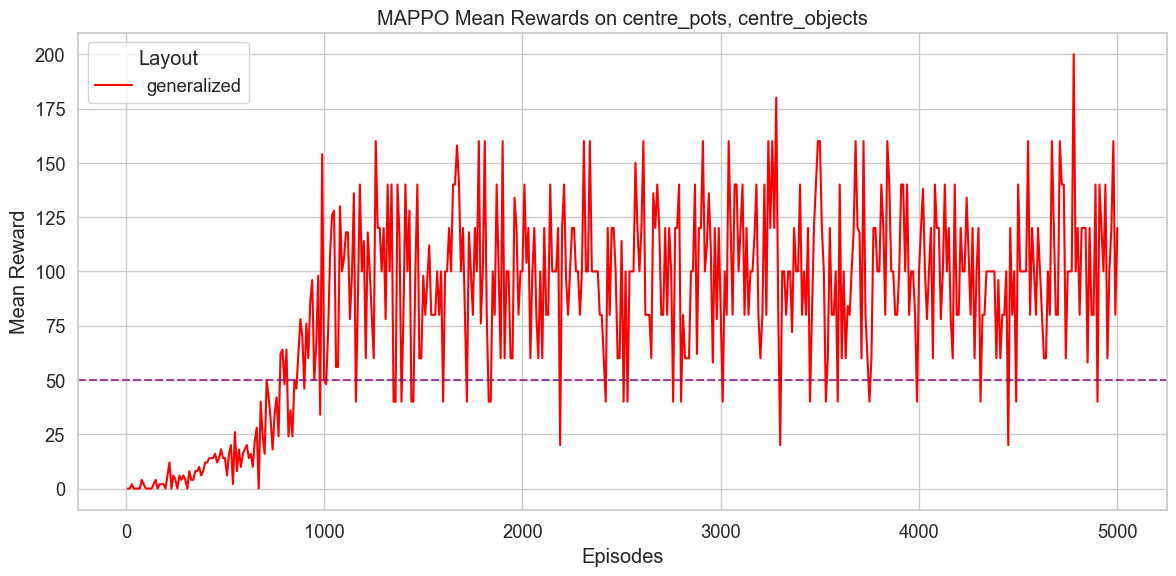

In [38]:
mappo_agent3,mean_rewards3, episode_rewards3, episode_time3, actor_losses3, critic_losses3  = train_and_plot_mappo(
    layouts=layouts3,
    model_name="multi_layout_generalized3",
    iters=10,
    episodes_per_batch=episodes_per_batch_mappo,
    batches=batches_mappo
)

In [39]:
evaluate_agent(
    layouts=layouts3,
    test_episodes=5,
    agent=mappo_agent3,
    actor_path="multi_layout_generalized3_actor.pth",
    critic_path="multi_layout_generalized3_critic.pth"
)

Testing layout: centre_pots
10
10
10
10
10
 Completed centre_pots: 5 episodes
Testing layout: centre_objects
0
0
0
0
0
 Completed centre_objects: 5 episodes

Test Results over 5 episodes per layout:
  Layout: centre_pots
    Avg Reward: 200.00
    Avg Soups Delivered: 10.00
  Layout: centre_objects
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00


([[200, 200, 200, 200, 200], [0, 0, 0, 0, 0]],
 [[10, 10, 10, 10, 10], [0, 0, 0, 0, 0]])

Training on multiple layouts: ['cramped_room', 'coordination_ring', 'forced_coordination', 'large_room', 'five_by_five']


Training Progress:   5%|▍         | 50/1050 [01:54<37:39,  2.26s/episode]

Batch 50, Mean Reward: 2.00, Actor Loss: 0.0016, Critic Loss: 0.2942


Training Progress:  10%|▉         | 100/1050 [03:48<36:51,  2.33s/episode]

Batch 100, Mean Reward: 28.00, Actor Loss: -0.0023, Critic Loss: 2.7895


Training Progress:  14%|█▍        | 150/1050 [05:50<37:46,  2.52s/episode]

Batch 150, Mean Reward: 46.00, Actor Loss: 0.0005, Critic Loss: 0.5495


Training Progress:  19%|█▉        | 200/1050 [07:55<34:03,  2.40s/episode]

Batch 200, Mean Reward: 46.00, Actor Loss: -0.0019, Critic Loss: 1.0290


Training Progress:  24%|██▍       | 250/1050 [10:00<32:46,  2.46s/episode]

Batch 250, Mean Reward: 44.00, Actor Loss: -0.0010, Critic Loss: 0.4147


Training Progress:  29%|██▊       | 300/1050 [12:04<30:14,  2.42s/episode]

Batch 300, Mean Reward: 56.00, Actor Loss: -0.0008, Critic Loss: 1.1535


Training Progress:  33%|███▎      | 350/1050 [14:07<28:49,  2.47s/episode]

Batch 350, Mean Reward: 58.00, Actor Loss: -0.0005, Critic Loss: 1.8283


Training Progress:  38%|███▊      | 400/1050 [16:13<27:19,  2.52s/episode]

Batch 400, Mean Reward: 30.00, Actor Loss: -0.0020, Critic Loss: 2.2539


Training Progress:  43%|████▎     | 450/1050 [18:17<24:53,  2.49s/episode]

Batch 450, Mean Reward: 64.00, Actor Loss: -0.0002, Critic Loss: 2.0381


Training Progress:  48%|████▊     | 500/1050 [20:23<23:23,  2.55s/episode]

Batch 500, Mean Reward: 80.00, Actor Loss: -0.0009, Critic Loss: 2.5713


Training Progress:  52%|█████▏    | 550/1050 [22:29<21:22,  2.57s/episode]

Batch 550, Mean Reward: 48.00, Actor Loss: -0.0019, Critic Loss: 1.5537


Training Progress:  57%|█████▋    | 600/1050 [24:35<18:49,  2.51s/episode]

Batch 600, Mean Reward: 68.00, Actor Loss: -0.0020, Critic Loss: 2.2690


Training Progress:  62%|██████▏   | 650/1050 [26:41<16:49,  2.52s/episode]

Batch 650, Mean Reward: 106.00, Actor Loss: -0.0003, Critic Loss: 2.7321


Training Progress:  67%|██████▋   | 700/1050 [28:49<15:23,  2.64s/episode]

Batch 700, Mean Reward: 146.00, Actor Loss: -0.0008, Critic Loss: 4.3293


Training Progress:  71%|███████▏  | 750/1050 [31:00<13:00,  2.60s/episode]

Batch 750, Mean Reward: 40.00, Actor Loss: -0.0008, Critic Loss: 1.0276


Training Progress:  76%|███████▌  | 800/1050 [33:11<10:36,  2.55s/episode]

Batch 800, Mean Reward: 22.00, Actor Loss: 0.0068, Critic Loss: 0.8481


Training Progress:  81%|████████  | 850/1050 [35:21<08:34,  2.57s/episode]

Batch 850, Mean Reward: 66.00, Actor Loss: 0.0068, Critic Loss: 2.1139


Training Progress:  86%|████████▌ | 900/1050 [37:32<06:30,  2.60s/episode]

Batch 900, Mean Reward: 94.00, Actor Loss: -0.0043, Critic Loss: 1.2169


Training Progress:  90%|█████████ | 950/1050 [39:43<04:15,  2.55s/episode]

Batch 950, Mean Reward: 128.00, Actor Loss: -0.0008, Critic Loss: 2.3177


Training Progress:  95%|█████████▌| 1000/1050 [41:54<02:10,  2.61s/episode]

Batch 1000, Mean Reward: 152.00, Actor Loss: -0.0003, Critic Loss: 4.2838


Training Progress: 100%|██████████| 1050/1050 [44:05<00:00,  2.52s/episode]

Batch 1050, Mean Reward: 144.00, Actor Loss: -0.0009, Critic Loss: 2.1326
Models saved as multi_layout_generalize4_actor.pth and multi_layout_generalize4_critic.pth


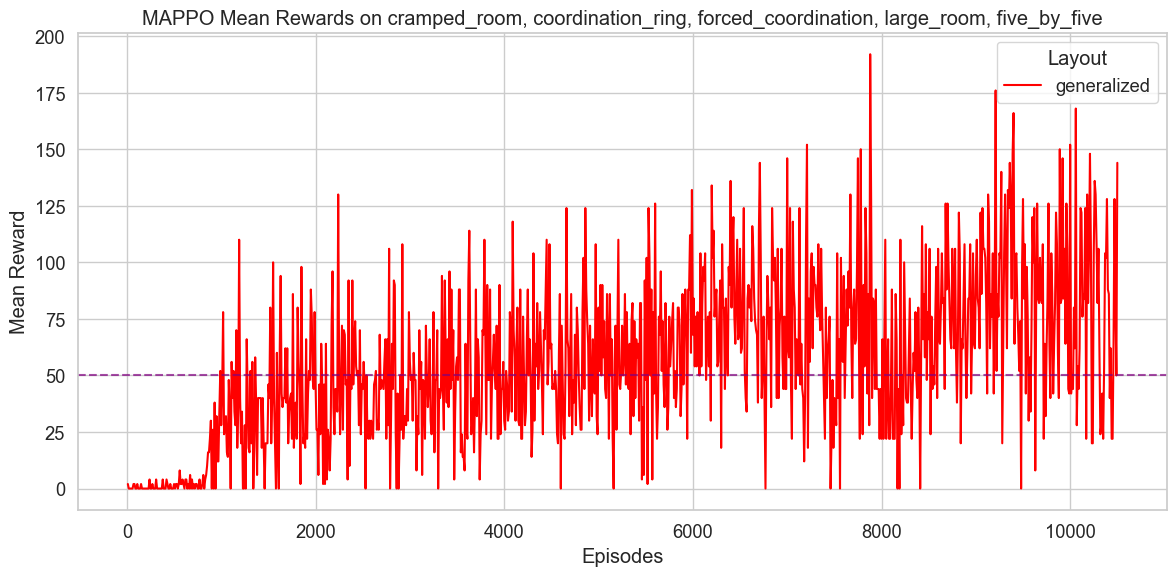

In [40]:
mappo_agent4,mean_rewards4, episode_rewards4, episode_time4, actor_losses4, critic_losses4  = train_and_plot_mappo(
    layouts=layouts4,
    model_name="multi_layout_generalize4",
    iters=10,
    episodes_per_batch=10,
    batches=1050
)

In [43]:
evaluate_agent(
    layouts=layouts4,
    test_episodes=5,
    agent=mappo_agent4,
    actor_path="multi_layout_generalized4_actor.pth",
    critic_path="multi_layout_generalized4_critic.pth"
)

Testing layout: cramped_room
10
10
10
10
10
 Completed cramped_room: 5 episodes
Testing layout: coordination_ring
0
0
0
0
0
 Completed coordination_ring: 5 episodes
Testing layout: forced_coordination
3
4
4
3
5
 Completed forced_coordination: 5 episodes
Testing layout: large_room
7
6
7
7
7
 Completed large_room: 5 episodes
Testing layout: five_by_five
0
0
0
0
0
 Completed five_by_five: 5 episodes

Test Results over 5 episodes per layout:
  Layout: cramped_room
    Avg Reward: 200.00
    Avg Soups Delivered: 10.00
  Layout: coordination_ring
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00
  Layout: forced_coordination
    Avg Reward: 76.00
    Avg Soups Delivered: 3.80
  Layout: large_room
    Avg Reward: 136.00
    Avg Soups Delivered: 6.80
  Layout: five_by_five
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00


([[200, 200, 200, 200, 200],
  [0, 0, 0, 0, 0],
  [60, 80, 80, 60, 100],
  [140, 120, 140, 140, 140],
  [0, 0, 0, 0, 0]],
 [[10, 10, 10, 10, 10],
  [0, 0, 0, 0, 0],
  [3, 4, 4, 3, 5],
  [7, 6, 7, 7, 7],
  [0, 0, 0, 0, 0]])

Training on multiple layouts: ['cramped_room', 'coordination_ring', 'forced_coordination', 'large_room', 'five_by_five', 'centre_pots', 'centre_objects']


Training Progress:   2%|▎         | 50/2000 [02:13<1:37:39,  3.00s/episode]

Batch 50, Mean Reward: 0.00, Actor Loss: 0.0053, Critic Loss: 0.0547


Training Progress:   5%|▌         | 100/2000 [04:37<1:26:23,  2.73s/episode]

Batch 100, Mean Reward: 0.00, Actor Loss: 0.0007, Critic Loss: 0.0235


Training Progress:   8%|▊         | 150/2000 [07:07<1:32:15,  2.99s/episode]

Batch 150, Mean Reward: 0.00, Actor Loss: 0.0017, Critic Loss: 0.0251


Training Progress:  10%|█         | 200/2000 [09:52<1:42:10,  3.41s/episode]

Batch 200, Mean Reward: 10.00, Actor Loss: 0.0012, Critic Loss: 0.9614


Training Progress:  12%|█▎        | 250/2000 [12:30<1:31:24,  3.13s/episode]

Batch 250, Mean Reward: 8.00, Actor Loss: -0.0021, Critic Loss: 0.1911


Training Progress:  15%|█▌        | 300/2000 [15:04<1:29:27,  3.16s/episode]

Batch 300, Mean Reward: 52.00, Actor Loss: -0.0002, Critic Loss: 1.0174


Training Progress:  18%|█▊        | 350/2000 [17:40<1:32:35,  3.37s/episode]

Batch 350, Mean Reward: 80.00, Actor Loss: -0.0032, Critic Loss: 1.7678


Training Progress:  20%|██        | 400/2000 [20:21<1:32:04,  3.45s/episode]

Batch 400, Mean Reward: 48.00, Actor Loss: 0.0039, Critic Loss: 0.8590


Training Progress:  22%|██▎       | 450/2000 [23:03<1:25:47,  3.32s/episode]

Batch 450, Mean Reward: 102.00, Actor Loss: -0.0004, Critic Loss: 1.6866


Training Progress:  25%|██▌       | 500/2000 [25:43<1:25:00,  3.40s/episode]

Batch 500, Mean Reward: 110.00, Actor Loss: -0.0012, Critic Loss: 2.0543


Training Progress:  28%|██▊       | 550/2000 [28:24<1:18:58,  3.27s/episode]

Batch 550, Mean Reward: 68.00, Actor Loss: -0.0007, Critic Loss: 0.9110


Training Progress:  30%|███       | 600/2000 [31:04<1:15:38,  3.24s/episode]

Batch 600, Mean Reward: 98.00, Actor Loss: -0.0030, Critic Loss: 1.7879


Training Progress:  32%|███▎      | 650/2000 [33:38<1:05:26,  2.91s/episode]

Batch 650, Mean Reward: 120.00, Actor Loss: -0.0006, Critic Loss: 1.6166


Training Progress:  35%|███▌      | 700/2000 [36:14<1:05:13,  3.01s/episode]

Batch 700, Mean Reward: 192.00, Actor Loss: -0.0021, Critic Loss: 2.9844


Training Progress:  38%|███▊      | 750/2000 [38:39<59:20,  2.85s/episode]  

Batch 750, Mean Reward: 142.00, Actor Loss: -0.0002, Critic Loss: 1.5021


Training Progress:  40%|████      | 800/2000 [41:06<54:20,  2.72s/episode]  

Batch 800, Mean Reward: 132.00, Actor Loss: 0.0015, Critic Loss: 1.7619


Training Progress:  42%|████▎     | 850/2000 [43:39<56:47,  2.96s/episode]  

Batch 850, Mean Reward: 114.00, Actor Loss: -0.0000, Critic Loss: 0.8669


Training Progress:  45%|████▌     | 900/2000 [46:10<59:18,  3.24s/episode]  

Batch 900, Mean Reward: 110.00, Actor Loss: -0.0001, Critic Loss: 1.6883


Training Progress:  48%|████▊     | 950/2000 [48:42<53:02,  3.03s/episode]  

Batch 950, Mean Reward: 94.00, Actor Loss: -0.0001, Critic Loss: 1.3276


Training Progress:  50%|█████     | 1000/2000 [51:16<50:07,  3.01s/episode]

Batch 1000, Mean Reward: 66.00, Actor Loss: -0.0004, Critic Loss: 0.9658


Training Progress:  52%|█████▎    | 1050/2000 [53:53<49:04,  3.10s/episode]

Batch 1050, Mean Reward: 194.00, Actor Loss: -0.0006, Critic Loss: 2.2232


Training Progress:  55%|█████▌    | 1100/2000 [56:23<50:02,  3.34s/episode]

Batch 1100, Mean Reward: 106.00, Actor Loss: -0.0001, Critic Loss: 2.2170


Training Progress:  57%|█████▊    | 1150/2000 [58:58<43:07,  3.04s/episode]

Batch 1150, Mean Reward: 42.00, Actor Loss: -0.0009, Critic Loss: 1.1669


Training Progress:  60%|██████    | 1200/2000 [1:01:35<40:50,  3.06s/episode]

Batch 1200, Mean Reward: 110.00, Actor Loss: -0.0004, Critic Loss: 1.1602


Training Progress:  62%|██████▎   | 1250/2000 [1:04:04<39:41,  3.18s/episode]

Batch 1250, Mean Reward: 110.00, Actor Loss: 0.0001, Critic Loss: 2.5016


Training Progress:  65%|██████▌   | 1300/2000 [1:06:40<39:10,  3.36s/episode]

Batch 1300, Mean Reward: 86.00, Actor Loss: -0.0008, Critic Loss: 1.6187


Training Progress:  68%|██████▊   | 1350/2000 [1:09:17<32:00,  2.96s/episode]

Batch 1350, Mean Reward: 130.00, Actor Loss: -0.0002, Critic Loss: 2.0387


Training Progress:  70%|███████   | 1400/2000 [1:11:56<30:29,  3.05s/episode]

Batch 1400, Mean Reward: 150.00, Actor Loss: 0.0000, Critic Loss: 1.4187


Training Progress:  72%|███████▎  | 1450/2000 [1:14:27<26:38,  2.91s/episode]

Batch 1450, Mean Reward: 108.00, Actor Loss: -0.0001, Critic Loss: 2.2450


Training Progress:  75%|███████▌  | 1500/2000 [1:17:04<27:29,  3.30s/episode]

Batch 1500, Mean Reward: 86.00, Actor Loss: -0.0002, Critic Loss: 1.1994


Training Progress:  78%|███████▊  | 1550/2000 [1:19:43<20:15,  2.70s/episode]

Batch 1550, Mean Reward: 204.00, Actor Loss: -0.0013, Critic Loss: 3.6078


Training Progress:  80%|████████  | 1600/2000 [1:22:21<20:55,  3.14s/episode]

Batch 1600, Mean Reward: 44.00, Actor Loss: -0.0001, Critic Loss: 0.2368


Training Progress:  82%|████████▎ | 1650/2000 [1:24:50<17:47,  3.05s/episode]

Batch 1650, Mean Reward: 116.00, Actor Loss: -0.0027, Critic Loss: 1.0881


Training Progress:  85%|████████▌ | 1700/2000 [1:27:18<14:32,  2.91s/episode]

Batch 1700, Mean Reward: 134.00, Actor Loss: -0.0004, Critic Loss: 1.3555


Training Progress:  88%|████████▊ | 1750/2000 [1:29:51<13:17,  3.19s/episode]

Batch 1750, Mean Reward: 128.00, Actor Loss: -0.0001, Critic Loss: 1.1783


Training Progress:  90%|█████████ | 1800/2000 [1:32:25<09:39,  2.90s/episode]

Batch 1800, Mean Reward: 108.00, Actor Loss: -0.0008, Critic Loss: 1.7440


Training Progress:  92%|█████████▎| 1850/2000 [1:34:57<06:45,  2.70s/episode]

Batch 1850, Mean Reward: 176.00, Actor Loss: -0.0006, Critic Loss: 2.3082


Training Progress:  95%|█████████▌| 1900/2000 [1:37:35<05:30,  3.31s/episode]

Batch 1900, Mean Reward: 174.00, Actor Loss: -0.0010, Critic Loss: 1.9817


Training Progress:  98%|█████████▊| 1950/2000 [1:40:12<02:42,  3.25s/episode]

Batch 1950, Mean Reward: 108.00, Actor Loss: -0.0004, Critic Loss: 1.6645


Training Progress: 100%|██████████| 2000/2000 [1:42:42<00:00,  3.08s/episode]

Batch 2000, Mean Reward: 88.00, Actor Loss: -0.0005, Critic Loss: 1.5983
Models saved as multi_layout_generalized5_actor.pth and multi_layout_generalized5_critic.pth


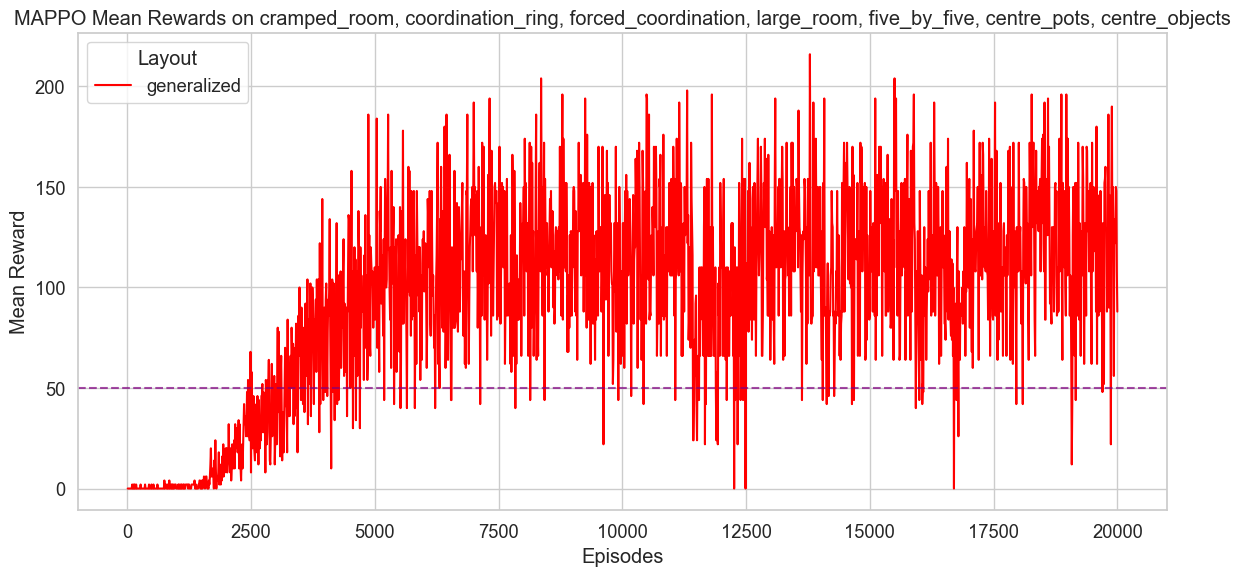

In [54]:
mappo_agent5,mean_rewards5, episode_rewards5, episode_time5, actor_losses5, critic_losses5  = train_and_plot_mappo(
    layouts=layouts5,
    model_name="multi_layout_generalized5",
    iters=5,
    episodes_per_batch=10,
    batches=2000
)

In [55]:
evaluate_agent(
    layouts=layouts5,
    test_episodes=5,
    agent=mappo_agent5,
    actor_path="multi_layout_generalized5_actor.pth",
    critic_path="multi_layout_generalized5_critic.pth"
)

Testing layout: cramped_room
11
11
11
11
11
 Completed cramped_room: 5 episodes
Testing layout: coordination_ring
0
0
0
0
0
 Completed coordination_ring: 5 episodes
Testing layout: forced_coordination
0
0
0
0
0
 Completed forced_coordination: 5 episodes
Testing layout: large_room
10
10
10
10
10
 Completed large_room: 5 episodes
Testing layout: five_by_five
4
11
11
1
11
 Completed five_by_five: 5 episodes
Testing layout: centre_pots
11
11
11
11
3
 Completed centre_pots: 5 episodes
Testing layout: centre_objects
0
0
0
0
0
 Completed centre_objects: 5 episodes

Test Results over 5 episodes per layout:
  Layout: cramped_room
    Avg Reward: 220.00
    Avg Soups Delivered: 11.00
  Layout: coordination_ring
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00
  Layout: forced_coordination
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00
  Layout: large_room
    Avg Reward: 200.00
    Avg Soups Delivered: 10.00
  Layout: five_by_five
    Avg Reward: 152.00
    Avg Soups Delivered: 7.60
  Layo

([[220, 220, 220, 220, 220],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [200, 200, 200, 200, 200],
  [80, 220, 220, 20, 220],
  [220, 220, 220, 220, 60],
  [0, 0, 0, 0, 0]],
 [[11, 11, 11, 11, 11],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [10, 10, 10, 10, 10],
  [4, 11, 11, 1, 11],
  [11, 11, 11, 11, 3],
  [0, 0, 0, 0, 0]])

In [58]:
layouts_unseen = [
           "simple_o",
           "simple_o_t",
           "simple_tomato",
           "asymmetric_advantages"
           ]
evaluate_agent(
    layouts=layouts_unseen,
    test_episodes=5,
    agent=mappo_agent5,
    actor_path="multi_layout_generalized5_actor.pth",
    critic_path="multi_layout_generalized5_critic.pth"
)

Testing layout: simple_o
0
0
0
0
0
 Completed simple_o: 5 episodes
Testing layout: simple_o_t
0
0
0
0
0
 Completed simple_o_t: 5 episodes
Testing layout: simple_tomato
0
0
0
0
0
 Completed simple_tomato: 5 episodes
Testing layout: asymmetric_advantages
0
0
0
0
0
 Completed asymmetric_advantages: 5 episodes

Test Results over 5 episodes per layout:
  Layout: simple_o
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00
  Layout: simple_o_t
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00
  Layout: simple_tomato
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00
  Layout: asymmetric_advantages
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00


([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])

## MAA2C generalization

In [19]:
# training hyperparameters
total_episodes= 5000

episodes_per_batch_maa2c=15
batches_maa2c= total_episodes // episodes_per_batch_maa2c

Training on multiple layouts: ['cramped_room', 'asymmetric_advantages']


Training Progress:  15%|█▌        | 50/333 [02:09<12:24,  2.63s/episode]

Batch 50, Mean Reward: 21.33, Actor Loss: 0.0086, Critic Loss: 2.5512


Training Progress:  30%|███       | 100/333 [04:19<10:05,  2.60s/episode]

Batch 100, Mean Reward: 70.67, Actor Loss: -0.0271, Critic Loss: 3.0742


Training Progress:  45%|████▌     | 150/333 [06:29<07:43,  2.53s/episode]

Batch 150, Mean Reward: 128.00, Actor Loss: -0.0457, Critic Loss: 6.7361


Training Progress:  60%|██████    | 200/333 [08:40<05:53,  2.66s/episode]

Batch 200, Mean Reward: 214.67, Actor Loss: 0.0394, Critic Loss: 9.2601


Training Progress:  75%|███████▌  | 250/333 [10:51<03:38,  2.63s/episode]

Batch 250, Mean Reward: 200.00, Actor Loss: 0.0228, Critic Loss: 7.9842


Training Progress:  90%|█████████ | 300/333 [13:02<01:25,  2.59s/episode]

Batch 300, Mean Reward: 220.00, Actor Loss: -0.1109, Critic Loss: 11.9350


Training Progress: 100%|██████████| 333/333 [14:29<00:00,  2.61s/episode]

Models saved as multi_layout_generalized1_actor.pth and multi_layout_generalized1_critic.pth


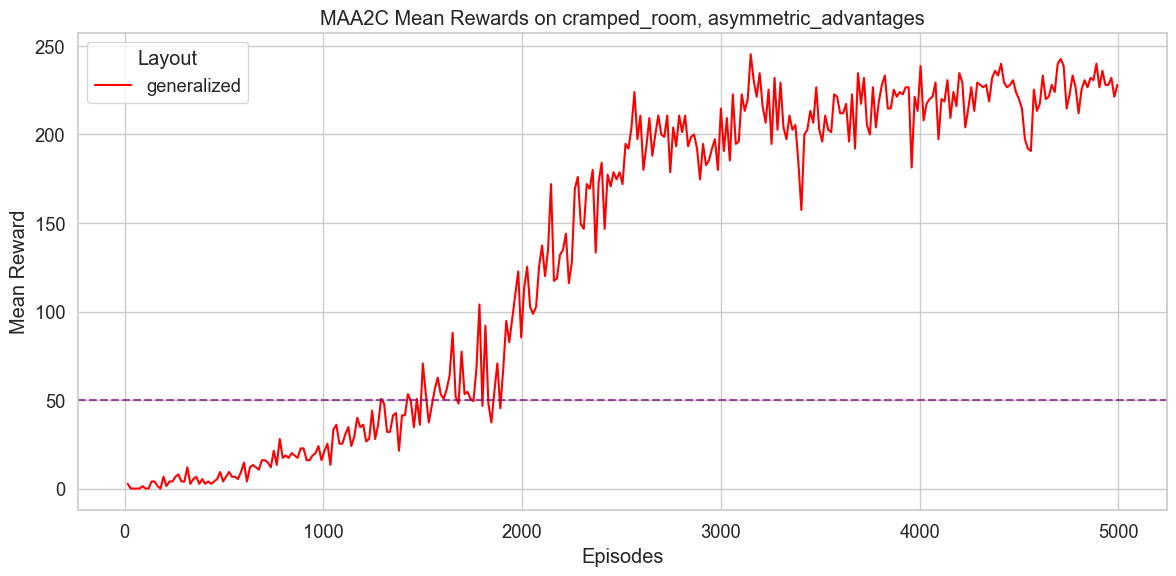

In [20]:
maa2c_agent1,mean_rewards1_a2c, episode_rewards1_a2c, episode_time1_a2c, actor_losses1_a2c, critic_losses1_a2c  = train_and_plot_maa2c(
    layouts=layouts1,
    model_name="multi_layout_generalized1",
    episodes_per_batch=episodes_per_batch_maa2c,
    batches=batches_maa2c
)

In [21]:
evaluate_agent(
    layouts=layouts1,
    test_episodes=5,
    agent=maa2c_agent1,
    actor_path="multi_layout_generalized1_actor.pth",
    critic_path="multi_layout_generalized1_critic.pth"
)

Testing layout: cramped_room
10
10
10
10
10
 Completed cramped_room: 5 episodes
Testing layout: asymmetric_advantages
13
13
13
13
13
 Completed asymmetric_advantages: 5 episodes

Test Results over 5 episodes per layout:
  Layout: cramped_room
    Avg Reward: 200.00
    Avg Soups Delivered: 10.00
  Layout: asymmetric_advantages
    Avg Reward: 260.00
    Avg Soups Delivered: 13.00


([[200, 200, 200, 200, 200], [260, 260, 260, 260, 260]],
 [[10, 10, 10, 10, 10], [13, 13, 13, 13, 13]])

Training on multiple layouts: ['cramped_room', 'coordination_ring', 'forced_coordination']


Training Progress:  15%|█▌        | 50/333 [02:05<11:48,  2.50s/episode]

Batch 50, Mean Reward: 4.00, Actor Loss: -0.0223, Critic Loss: 0.7786


Training Progress:  30%|███       | 100/333 [04:11<09:39,  2.49s/episode]

Batch 100, Mean Reward: 4.00, Actor Loss: -0.0186, Critic Loss: 0.5452


Training Progress:  45%|████▌     | 150/333 [06:18<07:49,  2.57s/episode]

Batch 150, Mean Reward: 1.33, Actor Loss: 0.0007, Critic Loss: 0.2591


Training Progress:  60%|██████    | 200/333 [08:25<05:32,  2.50s/episode]

Batch 200, Mean Reward: 36.00, Actor Loss: -0.0556, Critic Loss: 2.4516


Training Progress:  75%|███████▌  | 250/333 [10:32<03:31,  2.55s/episode]

Batch 250, Mean Reward: 36.00, Actor Loss: -0.0289, Critic Loss: 3.3758


Training Progress:  90%|█████████ | 300/333 [12:39<01:22,  2.49s/episode]

Batch 300, Mean Reward: 64.00, Actor Loss: 0.0558, Critic Loss: 4.8956


Training Progress: 100%|██████████| 333/333 [14:02<00:00,  2.53s/episode]

Models saved as multi_layout_generalized2_actor.pth and multi_layout_generalized2_critic.pth


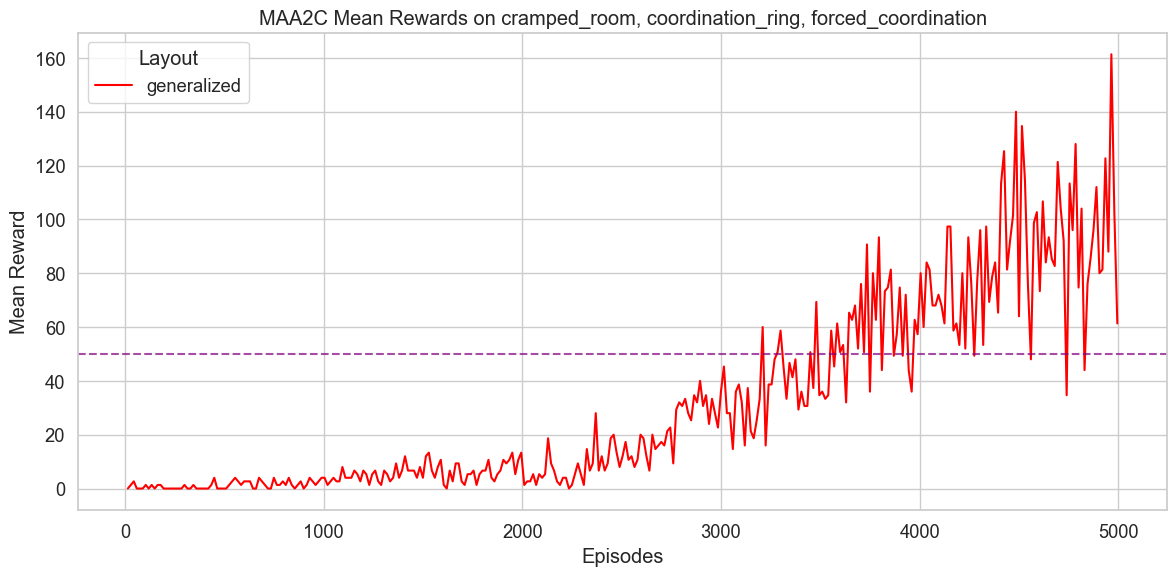

In [22]:
maa2c_agent2,mean_rewards2_a2c, episode_rewards2_a2c, episode_time2_a2c, actor_losses2_a2c, critic_losses2_a2c  = train_and_plot_maa2c(
    layouts=layouts2,
    model_name="multi_layout_generalized2",
    episodes_per_batch=episodes_per_batch_maa2c,
    batches=batches_maa2c
)

In [23]:
evaluate_agent(
    layouts=layouts2,
    test_episodes=5,
    agent=maa2c_agent2,
    actor_path="multi_layout_generalized2_actor.pth",
    critic_path="multi_layout_generalized2_critic.pth"
)

Testing layout: cramped_room
9
8
10
8
5
 Completed cramped_room: 5 episodes
Testing layout: coordination_ring
5
5
4
5
3
 Completed coordination_ring: 5 episodes
Testing layout: forced_coordination
0
0
0
0
0
 Completed forced_coordination: 5 episodes

Test Results over 5 episodes per layout:
  Layout: cramped_room
    Avg Reward: 160.00
    Avg Soups Delivered: 8.00
  Layout: coordination_ring
    Avg Reward: 88.00
    Avg Soups Delivered: 4.40
  Layout: forced_coordination
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00


([[180, 160, 200, 160, 100], [100, 100, 80, 100, 60], [0, 0, 0, 0, 0]],
 [[9, 8, 10, 8, 5], [5, 5, 4, 5, 3], [0, 0, 0, 0, 0]])

Training on multiple layouts: ['centre_pots', 'centre_objects']


Training Progress:  15%|█▌        | 50/333 [04:42<27:19,  5.79s/episode]

Batch 50, Mean Reward: 4.00, Actor Loss: -0.0125, Critic Loss: 0.8581


Training Progress:  30%|███       | 100/333 [09:26<22:17,  5.74s/episode]

Batch 100, Mean Reward: 9.33, Actor Loss: -0.0439, Critic Loss: 1.4498


Training Progress:  45%|████▌     | 150/333 [14:15<17:10,  5.63s/episode]

Batch 150, Mean Reward: 8.00, Actor Loss: -0.0150, Critic Loss: 0.9693


Training Progress:  60%|██████    | 200/333 [18:54<12:28,  5.63s/episode]

Batch 200, Mean Reward: 41.33, Actor Loss: -0.0633, Critic Loss: 3.0539


Training Progress:  75%|███████▌  | 250/333 [23:40<07:43,  5.59s/episode]

Batch 250, Mean Reward: 100.00, Actor Loss: -0.1105, Critic Loss: 5.0219


Training Progress:  90%|█████████ | 300/333 [28:27<03:06,  5.65s/episode]

Batch 300, Mean Reward: 138.67, Actor Loss: 0.0077, Critic Loss: 10.9846


Training Progress: 100%|██████████| 333/333 [31:38<00:00,  5.70s/episode]

Models saved as multi_layout_generalized3_actor.pth and multi_layout_generalized3_critic.pth


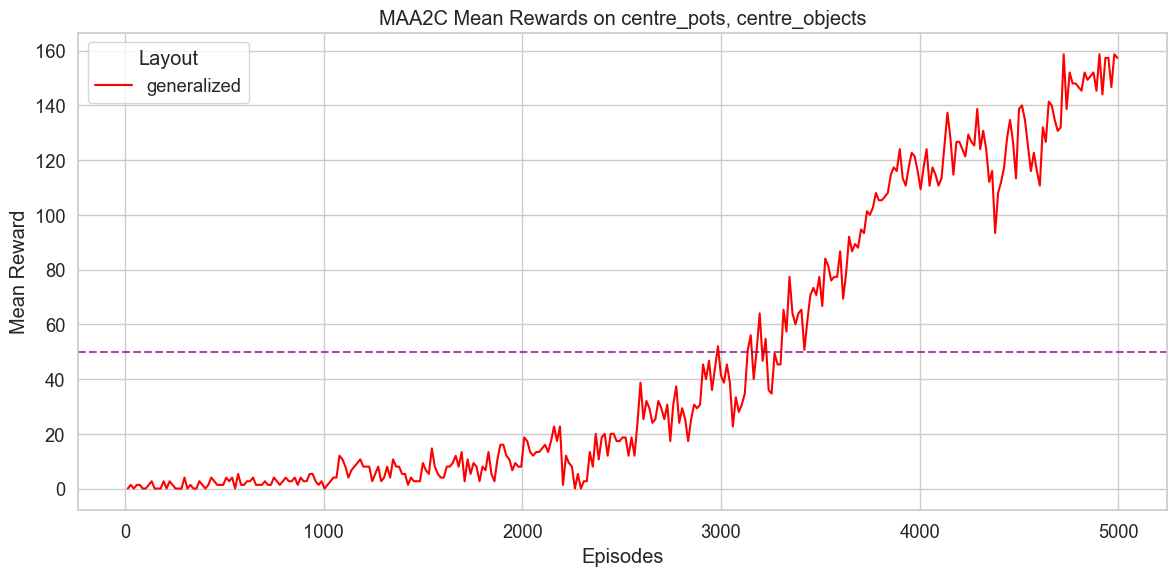

In [24]:
maa2c_agent3,mean_rewards3_a2c, episode_rewards3_a2c, episode_time3_a2c, actor_losses3_a2c, critic_losses3_a2c  = train_and_plot_maa2c(
    layouts=layouts3,
    model_name="multi_layout_generalized3",
    episodes_per_batch=episodes_per_batch_maa2c,
    batches=batches_maa2c
)

In [25]:
evaluate_agent(
    layouts=layouts3,
    test_episodes=5,
    agent=maa2c_agent3,
    actor_path="multi_layout_generalized3_actor.pth",
    critic_path="multi_layout_generalized3_critic.pth"
)

Testing layout: centre_pots
10
10
3
10
11
 Completed centre_pots: 5 episodes
Testing layout: centre_objects
6
7
7
7
7
 Completed centre_objects: 5 episodes

Test Results over 5 episodes per layout:
  Layout: centre_pots
    Avg Reward: 176.00
    Avg Soups Delivered: 8.80
  Layout: centre_objects
    Avg Reward: 136.00
    Avg Soups Delivered: 6.80


([[200, 200, 60, 200, 220], [120, 140, 140, 140, 140]],
 [[10, 10, 3, 10, 11], [6, 7, 7, 7, 7]])

Training on multiple layouts: ['cramped_room', 'coordination_ring', 'forced_coordination', 'large_room', 'five_by_five']


Training Progress:   7%|▋         | 50/700 [02:09<27:58,  2.58s/episode]

Batch 50, Mean Reward: 1.33, Actor Loss: -0.0175, Critic Loss: 0.3321


Training Progress:  14%|█▍        | 100/700 [04:17<25:50,  2.58s/episode]

Batch 100, Mean Reward: 0.00, Actor Loss: -0.0131, Critic Loss: 0.0415


Training Progress:  21%|██▏       | 150/700 [06:27<23:47,  2.60s/episode]

Batch 150, Mean Reward: 10.67, Actor Loss: -0.0365, Critic Loss: 1.1521


Training Progress:  29%|██▊       | 200/700 [08:39<22:02,  2.65s/episode]

Batch 200, Mean Reward: 22.67, Actor Loss: -0.0152, Critic Loss: 2.5970


Training Progress:  36%|███▌      | 250/700 [10:51<19:31,  2.60s/episode]

Batch 250, Mean Reward: 34.67, Actor Loss: -0.0546, Critic Loss: 2.5159


Training Progress:  43%|████▎     | 300/700 [13:03<17:11,  2.58s/episode]

Batch 300, Mean Reward: 45.33, Actor Loss: -0.0651, Critic Loss: 2.3353


Training Progress:  50%|█████     | 350/700 [15:16<15:18,  2.62s/episode]

Batch 350, Mean Reward: 93.33, Actor Loss: -0.0433, Critic Loss: 5.3019


Training Progress:  57%|█████▋    | 400/700 [17:28<13:24,  2.68s/episode]

Batch 400, Mean Reward: 68.00, Actor Loss: -0.0885, Critic Loss: 4.9581


Training Progress:  64%|██████▍   | 450/700 [19:42<11:04,  2.66s/episode]

Batch 450, Mean Reward: 80.00, Actor Loss: -0.0724, Critic Loss: 3.0931


Training Progress:  71%|███████▏  | 500/700 [21:56<08:57,  2.69s/episode]

Batch 500, Mean Reward: 140.00, Actor Loss: -0.0590, Critic Loss: 4.6820


Training Progress:  79%|███████▊  | 550/700 [24:09<06:40,  2.67s/episode]

Batch 550, Mean Reward: 141.33, Actor Loss: -0.1905, Critic Loss: 5.2675


Training Progress:  86%|████████▌ | 600/700 [26:21<04:24,  2.64s/episode]

Batch 600, Mean Reward: 150.67, Actor Loss: 0.0058, Critic Loss: 2.8306


Training Progress:  93%|█████████▎| 650/700 [28:34<02:14,  2.69s/episode]

Batch 650, Mean Reward: 157.33, Actor Loss: 0.0274, Critic Loss: 4.4311


Training Progress: 100%|██████████| 700/700 [30:47<00:00,  2.64s/episode]

Batch 700, Mean Reward: 176.00, Actor Loss: 0.0232, Critic Loss: 5.6339
Models saved as multi_layout_generalized4_actor.pth and multi_layout_generalized4_critic.pth


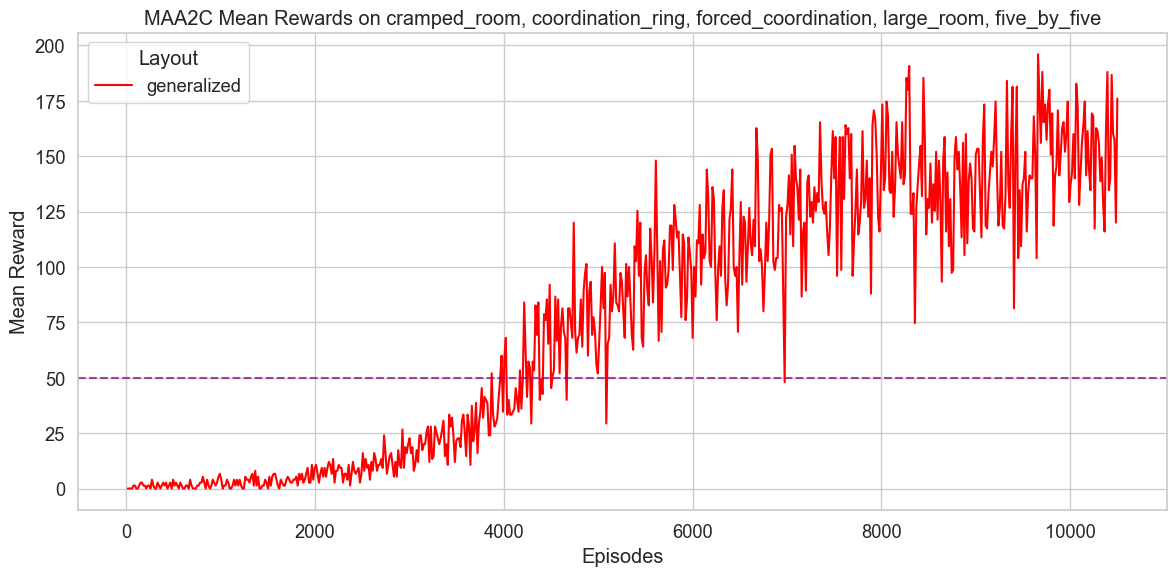

In [26]:
maa2c_agent4,mean_rewards4_a2c, episode_rewards4_a2c, episode_time4_a2c, actor_losses4_a2c, critic_losses4_a2c  = train_and_plot_maa2c(
    layouts=layouts4,
    model_name="multi_layout_generalized4",
    episodes_per_batch=15,
    batches=700
)

In [27]:
evaluate_agent(
    layouts=layouts4,
    test_episodes=5,
    agent=maa2c_agent4,
    actor_path="multi_layout_generalized4_actor.pth",
    critic_path="multi_layout_generalized4_critic.pth"
)

Testing layout: cramped_room
11
11
11
11
11
 Completed cramped_room: 5 episodes
Testing layout: coordination_ring
5
6
4
5
6
 Completed coordination_ring: 5 episodes
Testing layout: forced_coordination
0
0
0
0
0
 Completed forced_coordination: 5 episodes
Testing layout: large_room
9
9
9
9
9
 Completed large_room: 5 episodes
Testing layout: five_by_five
0
11
11
5
8
 Completed five_by_five: 5 episodes

Test Results over 5 episodes per layout:
  Layout: cramped_room
    Avg Reward: 220.00
    Avg Soups Delivered: 11.00
  Layout: coordination_ring
    Avg Reward: 104.00
    Avg Soups Delivered: 5.20
  Layout: forced_coordination
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00
  Layout: large_room
    Avg Reward: 180.00
    Avg Soups Delivered: 9.00
  Layout: five_by_five
    Avg Reward: 140.00
    Avg Soups Delivered: 7.00


([[220, 220, 220, 220, 220],
  [100, 120, 80, 100, 120],
  [0, 0, 0, 0, 0],
  [180, 180, 180, 180, 180],
  [0, 220, 220, 100, 160]],
 [[11, 11, 11, 11, 11],
  [5, 6, 4, 5, 6],
  [0, 0, 0, 0, 0],
  [9, 9, 9, 9, 9],
  [0, 11, 11, 5, 8]])

Training on multiple layouts: ['cramped_room', 'coordination_ring', 'forced_coordination', 'large_room', 'five_by_five', 'centre_pots', 'centre_objects']


Training Progress:   5%|▌         | 50/1000 [03:55<1:12:20,  4.57s/episode]

Batch 50, Mean Reward: 1.00, Actor Loss: -0.0209, Critic Loss: 0.2770


Training Progress:  10%|█         | 100/1000 [07:51<1:10:52,  4.72s/episode]

Batch 100, Mean Reward: 6.00, Actor Loss: -0.0336, Critic Loss: 1.2995


Training Progress:  15%|█▌        | 150/1000 [11:45<1:04:16,  4.54s/episode]

Batch 150, Mean Reward: 7.00, Actor Loss: -0.0112, Critic Loss: 0.8484


Training Progress:  20%|██        | 200/1000 [15:44<1:02:11,  4.66s/episode]

Batch 200, Mean Reward: 18.00, Actor Loss: -0.0622, Critic Loss: 1.4499


Training Progress:  25%|██▌       | 250/1000 [19:42<58:13,  4.66s/episode]  

Batch 250, Mean Reward: 29.00, Actor Loss: -0.0432, Critic Loss: 2.3240


Training Progress:  30%|███       | 300/1000 [23:41<55:27,  4.75s/episode]  

Batch 300, Mean Reward: 38.00, Actor Loss: -0.0306, Critic Loss: 2.9312


Training Progress:  35%|███▌      | 350/1000 [27:41<52:41,  4.86s/episode]

Batch 350, Mean Reward: 26.00, Actor Loss: -0.0434, Critic Loss: 1.9462


Training Progress:  40%|████      | 400/1000 [31:40<48:46,  4.88s/episode]

Batch 400, Mean Reward: 83.00, Actor Loss: -0.1803, Critic Loss: 6.3458


Training Progress:  45%|████▌     | 450/1000 [35:40<43:01,  4.69s/episode]

Batch 450, Mean Reward: 67.00, Actor Loss: -0.2028, Critic Loss: 4.5830


Training Progress:  50%|█████     | 500/1000 [39:37<39:29,  4.74s/episode]

Batch 500, Mean Reward: 77.00, Actor Loss: 0.0175, Critic Loss: 5.0766


Training Progress:  55%|█████▌    | 550/1000 [43:33<35:29,  4.73s/episode]

Batch 550, Mean Reward: 94.00, Actor Loss: 0.0021, Critic Loss: 7.6670


Training Progress:  60%|██████    | 600/1000 [47:34<31:39,  4.75s/episode]

Batch 600, Mean Reward: 82.00, Actor Loss: -0.0611, Critic Loss: 3.7395


Training Progress:  65%|██████▌   | 650/1000 [51:34<27:50,  4.77s/episode]

Batch 650, Mean Reward: 141.00, Actor Loss: -0.0908, Critic Loss: 4.9367


Training Progress:  70%|███████   | 700/1000 [55:43<25:54,  5.18s/episode]

Batch 700, Mean Reward: 141.00, Actor Loss: -0.1312, Critic Loss: 4.2685


Training Progress:  75%|███████▌  | 750/1000 [59:44<19:14,  4.62s/episode]

Batch 750, Mean Reward: 129.00, Actor Loss: -0.0295, Critic Loss: 4.3530


Training Progress:  80%|████████  | 800/1000 [1:03:46<15:43,  4.72s/episode]

Batch 800, Mean Reward: 190.00, Actor Loss: -0.0585, Critic Loss: 4.3699


Training Progress:  85%|████████▌ | 850/1000 [1:07:40<12:16,  4.91s/episode]

Batch 850, Mean Reward: 143.00, Actor Loss: -0.0155, Critic Loss: 4.9976


Training Progress:  90%|█████████ | 900/1000 [1:11:43<08:48,  5.28s/episode]

Batch 900, Mean Reward: 169.00, Actor Loss: -0.0493, Critic Loss: 3.5667


Training Progress:  95%|█████████▌| 950/1000 [1:15:46<04:04,  4.89s/episode]

Batch 950, Mean Reward: 157.00, Actor Loss: -0.0309, Critic Loss: 3.4063


Training Progress: 100%|██████████| 1000/1000 [1:19:45<00:00,  4.79s/episode]

Batch 1000, Mean Reward: 171.00, Actor Loss: -0.0206, Critic Loss: 7.2923
Models saved as multi_layout_generalized5_actor.pth and multi_layout_generalized5_critic.pth


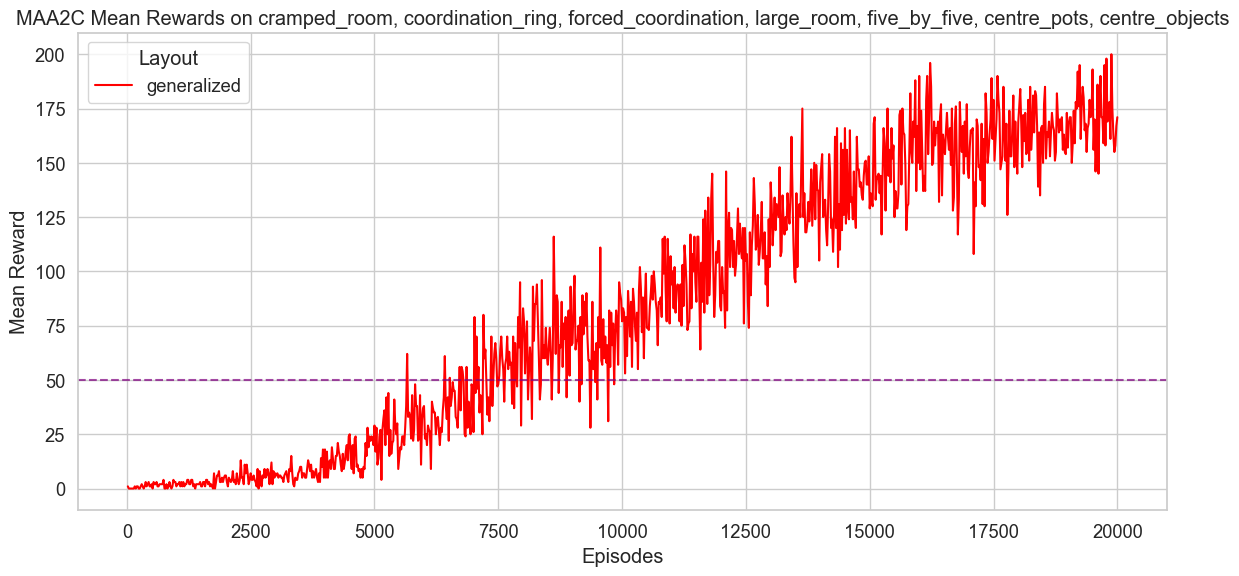

In [28]:
maa2c_agent5,mean_rewards5_a2c, episode_rewards5_a2c, episode_time5_a2c, actor_losses5_a2c, critic_losses5_a2c  = train_and_plot_maa2c(
    layouts=layouts5,
    model_name="multi_layout_generalized5",
    episodes_per_batch=20,
    batches=1000
)

In [29]:
evaluate_agent(
    layouts=layouts5,
    test_episodes=5,
    agent=maa2c_agent5,
    actor_path="multi_layout_generalized5_actor.pth",
    critic_path="multi_layout_generalized5_critic.pth"
)

Testing layout: cramped_room
11
11
11
11
11
 Completed cramped_room: 5 episodes
Testing layout: coordination_ring
8
8
8
7
8
 Completed coordination_ring: 5 episodes
Testing layout: forced_coordination
1
3
2
8
5
 Completed forced_coordination: 5 episodes
Testing layout: large_room
9
9
9
9
8
 Completed large_room: 5 episodes
Testing layout: five_by_five
11
12
10
10
12
 Completed five_by_five: 5 episodes
Testing layout: centre_pots
9
9
9
9
9
 Completed centre_pots: 5 episodes
Testing layout: centre_objects
8
8
8
8
9
 Completed centre_objects: 5 episodes

Test Results over 5 episodes per layout:
  Layout: cramped_room
    Avg Reward: 220.00
    Avg Soups Delivered: 11.00
  Layout: coordination_ring
    Avg Reward: 156.00
    Avg Soups Delivered: 7.80
  Layout: forced_coordination
    Avg Reward: 76.00
    Avg Soups Delivered: 3.80
  Layout: large_room
    Avg Reward: 176.00
    Avg Soups Delivered: 8.80
  Layout: five_by_five
    Avg Reward: 220.00
    Avg Soups Delivered: 11.00
  Layout: 

([[220, 220, 220, 220, 220],
  [160, 160, 160, 140, 160],
  [20, 60, 40, 160, 100],
  [180, 180, 180, 180, 160],
  [220, 240, 200, 200, 240],
  [180, 180, 180, 180, 180],
  [160, 160, 160, 160, 180]],
 [[11, 11, 11, 11, 11],
  [8, 8, 8, 7, 8],
  [1, 3, 2, 8, 5],
  [9, 9, 9, 9, 8],
  [11, 12, 10, 10, 12],
  [9, 9, 9, 9, 9],
  [8, 8, 8, 8, 9]])

In [30]:
# test on unseen layouts
actor_path = "multi_layout_generalized5_actor.pth"
critic_path = "multi_layout_generalized5_critic.pth"

layouts = [
           "simple_o",
           "simple_o_t",
           "simple_tomato",
           "asymmetric_advantages"
           ]
test_episodes = 5  

rewards, soups = test_soups_delivered(
    layouts=layouts,
    episodes=test_episodes,
    agent=maa2c_agent5,
    actor_path=actor_path,
    critic_path=critic_path
)

print(f"\nTest Results over {test_episodes} episodes per layout:")
for i, layout in enumerate(layouts):
    print(f"  Layout: {layout}")
    print(f"    Avg Reward: {sum(rewards[i]) / len(rewards[i]):.2f}")
    print(f"    Avg Soups Delivered: {sum(soups[i]) / len(soups[i]):.2f}")

Testing layout: simple_o
0
0
0
1
1
 Completed simple_o: 5 episodes
Testing layout: simple_o_t
3
2
1
2
1
 Completed simple_o_t: 5 episodes
Testing layout: simple_tomato
2
2
3
3
2
 Completed simple_tomato: 5 episodes
Testing layout: asymmetric_advantages
0
0
0
0
0
 Completed asymmetric_advantages: 5 episodes

Test Results over 5 episodes per layout:
  Layout: simple_o
    Avg Reward: 8.00
    Avg Soups Delivered: 0.40
  Layout: simple_o_t
    Avg Reward: 12.00
    Avg Soups Delivered: 1.80
  Layout: simple_tomato
    Avg Reward: 16.00
    Avg Soups Delivered: 2.40
  Layout: asymmetric_advantages
    Avg Reward: 0.00
    Avg Soups Delivered: 0.00


# Cross-algorithm training


We combine mappo and maa2c to test generalization capabilites when combined with a different and never seen before partner, in this case both trained on different layouts also.

### SINGLE-LAYOUT CROSS ALGORITHM EVALUATION

In [152]:
results = {}

results["asymmetric_advantages_fixed"] = run_cross_algorithm(
    layouts=["asymmetric_advantages"],
    agent1_path="asymmetric_advantages_selfplay_actor.pth",
    agent2_path="asymmetric_advantages_selfplay_actor.pth",
    randomize_positions=False
)

Episode 1: Reward = 260.00
Episode 2: Reward = 0.00
Episode 3: Reward = 20.00
Episode 4: Reward = 260.00
Episode 5: Reward = 260.00

Average reward over 5 episodes: 160.00


In [9]:
results["asymmetric_advantages_rand"] = run_cross_algorithm(
    layouts=["asymmetric_advantages"],
    agent1_path="asymmetric_advantages_selfplay_actor.pth",
    agent2_path="asymmetric_advantages_selfplay_actor.pth",
    randomize_positions=True
)

Episode 1: Reward = 20.00
Episode 2: Reward = 0.00
Episode 3: Reward = 100.00
Episode 4: Reward = 0.00
Episode 5: Reward = 20.00

Average reward over 5 episodes: 28.00


In [143]:
results["coordination_ring_fixed"] = run_cross_algorithm(
    layouts=["coordination_ring"],
    agent1_path="coordination_ring_selfplay_actor.pth",
    agent2_path="coordination_ring_selfplay_actor.pth",
    randomize_positions=False
)

Episode 1: Reward = 20.00
Episode 2: Reward = 20.00
Episode 3: Reward = 100.00
Episode 4: Reward = 40.00
Episode 5: Reward = 100.00

Average reward over 5 episodes: 56.00


In [11]:
results["coordination_ring_rand"] = run_cross_algorithm(
    layouts=["coordination_ring"],
    agent1_path="coordination_ring_selfplay_actor.pth",
    agent2_path="coordination_ring_selfplay_actor.pth",
    randomize_positions=True
)

Episode 1: Reward = 20.00
Episode 2: Reward = 0.00
Episode 3: Reward = 20.00
Episode 4: Reward = 20.00
Episode 5: Reward = 40.00

Average reward over 5 episodes: 20.00


In [22]:
results["cramped_room_fixed"] = run_cross_algorithm(
    layouts=["cramped_room"],
    agent1_path="cramped_room_selfplay_actor.pth",
    agent2_path="cramped_room_selfplay_actor.pth",
    randomize_positions=False
)

Episode 1: Reward = 40.00
Episode 2: Reward = 20.00
Episode 3: Reward = 0.00
Episode 4: Reward = 20.00
Episode 5: Reward = 0.00

Average reward over 5 episodes: 16.00


In [37]:
results["cramped_room_rand"] = run_cross_algorithm(
    layouts=["cramped_room"],
    agent1_path="cramped_room_selfplay_actor.pth",
    agent2_path="cramped_room_selfplay_actor.pth",
    randomize_positions=True
)

Episode 1: Reward = 0.00
Episode 2: Reward = 0.00
Episode 3: Reward = 20.00
Episode 4: Reward = 20.00
Episode 5: Reward = 20.00

Average reward over 5 episodes: 12.00


In [38]:
results["forced_coordination_fixed"] = run_cross_algorithm(
    layouts=["forced_coordination"],
    agent1_path="forced_coordination_selfplay_actor.pth",
    agent2_path="forced_coordination_selfplay_actor.pth",
    randomize_positions=False
)

Episode 1: Reward = 200.00
Episode 2: Reward = 220.00
Episode 3: Reward = 20.00
Episode 4: Reward = 40.00
Episode 5: Reward = 100.00

Average reward over 5 episodes: 116.00


In [39]:
results["forced_coordination_rand"] = run_cross_algorithm(
    layouts=["forced_coordination"],
    agent1_path="forced_coordination_selfplay_actor.pth",
    agent2_path="forced_coordination_selfplay_actor.pth",
    randomize_positions=True
)

Episode 1: Reward = 20.00
Episode 2: Reward = 20.00
Episode 3: Reward = 60.00
Episode 4: Reward = 20.00
Episode 5: Reward = 60.00

Average reward over 5 episodes: 36.00


### MULTIPLE-LAYOUT CROSS ALGORITHM EVALUATION

In [44]:
results["multi_layout1_cramped_fixed"] = run_cross_algorithm(
    layouts=["cramped_room"],
    agent1_path="multi_layout_generalized1_actor.pth",
    agent2_path="multi_layout_generalized1_actor.pth",
    randomize_positions=False
)

Episode 1: Reward = 80.00
Episode 2: Reward = 120.00
Episode 3: Reward = 60.00
Episode 4: Reward = 40.00
Episode 5: Reward = 60.00

Average reward over 5 episodes: 72.00


In [48]:
results["multi_layout1_cramped_rand"] = run_cross_algorithm(
    layouts=["cramped_room"],
    agent1_path="multi_layout_generalized1_actor.pth",
    agent2_path="multi_layout_generalized1_actor.pth",
    randomize_positions=True
)

Episode 1: Reward = 40.00
Episode 2: Reward = 20.00
Episode 3: Reward = 20.00
Episode 4: Reward = 20.00
Episode 5: Reward = 20.00

Average reward over 5 episodes: 24.00


In [51]:
results["multi_layout1_asym_rand"] = run_cross_algorithm(
    layouts=["asymmetric_advantages"],
    agent1_path="multi_layout_generalized1_actor.pth",
    agent2_path="multi_layout_generalized1_actor.pth",
    randomize_positions=True
)

Episode 1: Reward = 80.00
Episode 2: Reward = 20.00
Episode 3: Reward = 0.00
Episode 4: Reward = 80.00
Episode 5: Reward = 0.00

Average reward over 5 episodes: 36.00


In [ ]:
# final test broad layouts cross algorithm combination
results["multi_layout5_gen"] = run_cross_algorithm(
    layouts=["cramped_room"],
    agent1_path="multi_layout_generalized5_actor.pth",
    agent2_path="multi_layout_generalized5_actor.pth",
    randomize_positions=False
)

Episode 1: Reward = 220.00
Episode 2: Reward = 220.00
Episode 3: Reward = 220.00
Episode 4: Reward = 220.00
Episode 5: Reward = 220.00

Average reward over 5 episodes: 220.00


In [149]:
# final test broad layouts cross algorithm combination
results["multi_layout5_gen"] = run_cross_algorithm(
    layouts=["cramped_room"],
    agent1_path="multi_layout_generalized5_actor.pth",
    agent2_path="multi_layout_generalized5_actor.pth",
    randomize_positions=True
)

Episode 1: Reward = 40.00
Episode 2: Reward = 0.00
Episode 3: Reward = 0.00
Episode 4: Reward = 60.00
Episode 5: Reward = 0.00

Average reward over 5 episodes: 20.00


In [137]:
# final test broad layouts cross algorithm combination
results["multi_layout5_gen"] = run_cross_algorithm(
    layouts=["large_room"],
    agent1_path="multi_layout_generalized5_actor.pth",
    agent2_path="multi_layout_generalized5_actor.pth",
    randomize_positions=False
)

Episode 1: Reward = 180.00
Episode 2: Reward = 200.00
Episode 3: Reward = 180.00
Episode 4: Reward = 200.00
Episode 5: Reward = 180.00

Average reward over 5 episodes: 188.00


In [151]:
# final test broad layouts cross algorithm combination
results["multi_layout5_gen"] = run_cross_algorithm(
    layouts=["large_room"],
    agent1_path="multi_layout_generalized5_actor.pth",
    agent2_path="multi_layout_generalized5_actor.pth",
    randomize_positions=True
)

Episode 1: Reward = 0.00
Episode 2: Reward = 20.00
Episode 3: Reward = 0.00
Episode 4: Reward = 20.00
Episode 5: Reward = 20.00

Average reward over 5 episodes: 12.00
